<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; min-width: 250px; display: flex; justify-content: center;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" style="max-width: 80%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style='color:#6f800f'> Data Mining Project | </span>
            <span style='color:#393B79'>ABCDEats Inc.</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#6f800f, #393B79); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [271]:
# !pip install umap-learn

In [272]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap

# For profiling
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.base import clone
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
import umap


# Set the style of the visualization
pd.set_option('display.max_columns', None)                  # display all columns
# pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #6f800f,#393B79); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 2 | Cluster Analysis </b></h1></center>
</div>

## **🧮 Import Data**

In [163]:
# Importing the dataset after the preprocessing
ABCDEats = pd.read_parquet('data/DM2425_ABCDEats_preprocessed.parquet')

In [164]:
# Display the first 5 rows just to confirm the import was successful
ABCDEats.head() 

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360     -1.369832     -0.403188      -0.057759   
5d272b9dcb             8670     -1.514837     -0.403188      -0.597323   
f6d1b2ba63             4660      1.530270     -0.791802      -0.597323   
180c632ed8             4660     -0.499801     -0.403188      -0.417468   
4eb37a6705             4660     -1.079822     -0.403188      -0.057759   

             chain_count  first_order  last_order last_promo payment_method  \
customer_id                                                                   
1b8f824d5e     -0.494669    -1.185756    -2.69523   DELIVERY           DIGI   
5d272b9dcb     -0.200275    -1.185756    -2.69523   DISCOUNT           DIGI   
f6d1b2ba63     -0.200275    -1.185756    -2.69523   DISCOUNT           CASH   
180c632ed8     -0.494669    -1.185756    -2.65211   DELIVERY           DIGI   
4eb37a6705     -0.789063    -1.185756    -2.65211   NO PROMO           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e      -0.452244  -0.456181       -0.29786 -0.149594   
5d272b9dcb       0.803124  -0.151655       -0.29786 -0.149594   
f6d1b2ba63       0.448644  -0.456181       -0.29786 -0.149594   
180c632ed8      -0.452244   0.196715       -0.29786 -0.149594   
4eb37a6705       0.974489   1.491545       -0.29786 -0.149594   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e            -0.243423    -0.224882     -0.188975    -0.191447   
5d272b9dcb            -0.243423    -0.224882     -0.188975    -0.191447   
f6d1b2ba63            -0.243423    -0.224882     -0.188975    -0.191447   
180c632ed8            -0.243423    -0.224882     -0.188975    -0.191447   
4eb37a6705            -0.243423    -0.224882     -0.188975    -0.191447   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     4.780856    -0.308886     -0.330915          -0.181661   
5d272b9dcb    -0.251027    -0.308886     -0.330915          -0.181661   
f6d1b2ba63    -0.251027    -0.308886     -0.330915          -0.181661   
180c632ed8     2.860796    -0.308886     -0.330915          -0.181661   
4eb37a6705    -0.251027    -0.308886     -0.330915          -0.181661   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai    Sunday  \
customer_id                                                            
1b8f824d5e   -0.341874                 -0.272155 -0.209257  0.522801   
5d272b9dcb   -0.341874                 -0.272155 -0.209257  0.522801   
f6d1b2ba63   -0.341874                 -0.272155 -0.209257  0.522801   
180c632ed8   -0.341874                 -0.272155 -0.209257 -0.573077   
4eb37a6705   -0.341874                 -0.272155 -0.209257 -0.573077   

               Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
customer_id                                                                
1b8f824d5e  -0.574093 -0.592096  -0.606433   -0.6528 -0.631341   0.30673   
5d272b9dcb  -0.574093 -0.592096  -0.606433   -0.6528 -0.631341   0.30673   
f6d1b2ba63  -0.574093 -0.592096  -0.606433   -0.6528 -0.631341   0.30673   
180c632ed8   0.506226 -0.592096  -0.606433   -0.6528 -0.631341   0.30673   
4eb37a6705   0.506226 -0.592096  -0.606433   -0.6528 -0.631341   0.30673   

                 HR_0     HR_1      HR_2     HR_3      HR_4      HR_5  \
customer_id                                                             
1b8f824d5e  -0.166419 -0.17413 -0.187676 -0.24074 -0.241155 -0.230568   
5d272b9dcb  -0.166419 -0.17413 -0.187676 -0.24074 -0.241155 -0.230568   
f6d1b2ba63  -0.166419 -0.17413 -0.187676 -0.24074 -0.241155 -0.230568   
180c632ed8  -0.166419 -0.17413 -0.187676 -

In [165]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 31279
Number of columns : 122


In [166]:
# Check the data types
ABCDEats.dtypes

customer_region               object
customer_age                 float64
vendor_count                 float64
product_count                float64
chain_count                  float64
                              ...   
CUI_Beverages_Thai_PC        float64
HR_Lunch_Dinner_PC           float64
HR_LateNight_Breakfast_PC    float64
HR_Evening_PC                float64
HR_AfternoonSnack_PC         float64
Length: 122, dtype: object

---

In [167]:
# Create a continuous and discrete colormap
colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F"]
NOVAIMS_palette_colors = sns.color_palette(colors[::-1], as_cmap=True)

colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F", "#FFFFFF"]
NOVAIMS_palette_colors_continuous = LinearSegmentedColormap.from_list("NOVAIMS_palette", colors[::-1])

In [168]:
# list(ABCDEats.columns)

In [169]:
# Define metric and non-metric features
metric_features = [
    # 'vendor_count', 'product_count', 'days_between_orders' -> removed due to multicollinearity
    'chain_count', 'first_order', 'last_order',
    'order_count', 
    'days_between_orders_per_order',
    'CUI_Total_Amount_Spent',
    'CUI_Total_Food_Types',
    'CUI_Avg_Amount_Spent',
    
    # Principal Components [CUI] 
    'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 
    'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',

    # Original [DOW]
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    
    # Principal Components [HR]
    'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'
]

# Non-metric columns
non_metric_features = [
    'customer_age_group', 'customer_region_buckets', 'customer_region', 
    'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine',
]

# Not-Used
not_used_features = ['customer_age', 
                     'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                     'CUI_Most_Spent_Cuisine_Asian', 'CUI_Most_Spent_Cuisine_Beverages',  'CUI_Most_Spent_Cuisine_Cafe', 'CUI_Most_Spent_Cuisine_Chicken Dishes',  'CUI_Most_Spent_Cuisine_Chinese',
                     'CUI_Most_Spent_Cuisine_Desserts', 'CUI_Most_Spent_Cuisine_Healthy', 'CUI_Most_Spent_Cuisine_Indian', 'CUI_Most_Spent_Cuisine_Italian', 'CUI_Most_Spent_Cuisine_Japanese',
                     'CUI_Most_Spent_Cuisine_Noodle Dishes', 'CUI_Most_Spent_Cuisine_OTHER', 'CUI_Most_Spent_Cuisine_Street Food / Snacks', 'CUI_Most_Spent_Cuisine_Thai',
                     'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'HR_0', 'HR_1', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_13', 'HR_16', 'HR_17', 'HR_18',
                     'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'HR_3', 'HR_4', 'HR_3', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
                     'customer_region_2440', 'customer_region_2490', 'customer_region_4140', 'customer_region_4660', 'customer_region_8370', 'customer_region_8330', 'customer_region_8670',
                     'customer_region_Unknown', 'customer_region_buckets_4', 'customer_region_buckets_8', 'customer_region_buckets_U', 'days_between_orders', 
                     'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'last_promo_NO PROMO', 'last_promo_bin_True', 'payment_method_CASH', 'payment_method_DIGI', 'product_count', 'vendor_count']


not_used_features_metric = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                            'vendor_count', 'product_count', 'days_between_orders',
                            'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_3', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_13', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
not_used_features_non_metric = ['customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


print(f'Metric columns: {len(metric_features)}, {metric_features} \n')
print(f'Non-Metric columns: {len(non_metric_features)}, {non_metric_features}')

Metric columns: 26, ['chain_count', 'first_order', 'last_order', 'order_count', 'days_between_orders_per_order', 'CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'] 

Non-Metric columns: 7, ['customer_age_group', 'customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


In [170]:
# Check what columns are not used in the clustering
# set(ABCDEats.columns) - set(metric_features) - set(non_metric_features)

In [171]:
# List of weekdays (0 = Sunday, 6 = Saturday)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekdays_dict = dict(enumerate(weekdays))
weekdays_dict

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

In [172]:
# List of variables in different perspectives
value_vars = ['CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 
              'order_count', 
              'days_between_orders_per_order', 
              'chain_count']

behavior_vars = ['first_order', 'last_order',
                 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 
                 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 
                 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',
                 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC',
                 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

---

## **⚫🟢⚪ Clustering [Final Solution]**

#### **Hierarchical Clustering Algorithm[<sup>[1]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)**

In [173]:
# Importing the HC cluster labels
HC_labels = pd.read_parquet('data/DM2423_ABCDEats_HierarchicalClustering.parquet')

# Rename the column 'labels', 'labels_value', 'labels_behaviors' to 'HC_labels', 'HC_labels_value', 'HC_labels_behaviors'
HC_labels.rename(columns={'labels': 'HC_labels', 'labels_value': 'HC_labels_value', 'labels_behaviors': 'HC_labels_behaviors'}, inplace=True)

# Merge the HC_labels with the ABCDEats dataset
ABCDEats = ABCDEats.merge(HC_labels, on='customer_id')

---

#### **K-Means Algorithm[<sup>[2]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**

In [174]:
# Importing the KMeans cluster labels
KMeans_labels = pd.read_parquet('data/DM2425_ABCDEats_KMeansClustering.parquet')

# Rename the column 'labels', 'labels_value', 'labels_behaviors' to 'KMeans_labels', 'KMeans_labels_value', 'KMeans_labels_behaviors'
KMeans_labels.rename(columns={'labels': 'KMeans_labels', 'labels_value': 'KMeans_labels_value', 'labels_behavior': 'KMeans_labels_behaviors'}, inplace=True)

# Merge the KMeans_labels with the ABCDEats dataset
ABCDEats = ABCDEats.merge(KMeans_labels, on='customer_id')

---

#### **Self Organizing Maps (SOM) [<sup>[3]</sup>](https://github.com/sevamoo/sompy)**

In [175]:
# Importing the SOM cluster labels
SOM_labels = pd.read_parquet('data/DM2425_ABCDEats_SOM_ClusterLabels.parquet')

# Rename the column 'labels_SOM+HC', 'labels_SOM+KM' to 'SOM+HC_labels', 'SOM+KM_labels'
#                   'labels_value_SOM+HC', 'labels_value_SOM+KM' to 'SOM+HC_labels_value', 'SOM+KM_labels_value'
#                   'labels_behavior_SOM+HC', 'labels_behavior_SOM+KM' to 'SOM+HC_labels_behaviors', 'SOM+KM_labels_behaviors'
SOM_labels.rename(columns={'labels_SOM+HC': 'SOM+HC_labels', 'labels_SOM+KM': 'SOM+KM_labels',
                           'labels_value_SOM+HC': 'SOM+HC_labels_value', 'labels_value_SOM+KM': 'SOM+KM_labels_value',
                           'labels_behavior_SOM+HC': 'SOM+HC_labels_behaviors', 'labels_behavior_SOM+KM': 'SOM+KM_labels_behaviors'}, inplace=True)

# Merge the SOM_labels with the ABCDEats dataset
ABCDEats = ABCDEats.merge(SOM_labels, on='customer_id')

In [176]:
ABCDEats

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360     -1.369832     -0.403188      -0.057759   
5d272b9dcb             8670     -1.514837     -0.403188      -0.597323   
f6d1b2ba63             4660      1.530270     -0.791802      -0.597323   
180c632ed8             4660     -0.499801     -0.403188      -0.417468   
4eb37a6705             4660     -1.079822     -0.403188      -0.057759   
...                     ...           ...           ...            ...   
f4e366c281             8670      0.370229     -0.791802      -0.777177   
f6b6709018             8670     -0.789811     -0.791802      -0.777177   
f74ad8ce3f             8670     -0.499801     -0.791802      -0.777177   
f7b19c0241             8670      0.950249     -0.791802      -0.777177   
fd40d3b0e0             4660      0.370229     -0.791802      -0.777177   

             chain_count  first_order  last_order last_promo payment_method  \
customer_id                                                                   
1b8f824d5e     -0.494669    -1.185756   -2.695230   DELIVERY           DIGI   
5d272b9dcb     -0.200275    -1.185756   -2.695230   DISCOUNT           DIGI   
f6d1b2ba63     -0.200275    -1.185756   -2.695230   DISCOUNT           CASH   
180c632ed8     -0.494669    -1.185756   -2.652110   DELIVERY           DIGI   
4eb37a6705     -0.789063    -1.185756   -2.652110   NO PROMO           DIGI   
...                  ...          ...         ...        ...            ...   
f4e366c281     -0.494669    -1.185756   -2.738349    FREEBIE           DIGI   
f6b6709018     -0.789063    -1.185756   -2.738349   DELIVERY           DIGI   
f74ad8ce3f     -0.494669    -1.185756   -2.738349   NO PROMO           DIGI   
f7b19c0241     -0.789063    -1.185756   -2.738349   DISCOUNT           DIGI   
fd40d3b0e0     -0.789063    -1.185756   -2.738349   NO PROMO           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e      -0.452244  -0.456181      -0.297860 -0.149594   
5d272b9dcb       0.803124  -0.151655      -0.297860 -0.149594   
f6d1b2ba63       0.448644  -0.456181      -0.297860 -0.149594   
180c632ed8      -0.452244   0.196715      -0.297860 -0.149594   
4eb37a6705       0.974489   1.491545      -0.297860 -0.149594   
...                   ...        ...            ...       ...   
f4e366c281      -0.452244  -0.456181       2.207522 -0.149594   
f6b6709018       1.314280  -0.456181      -0.297860 -0.149594   
f74ad8ce3f      -0.452244  -0.456181      -0.297860 -0.149594   
f7b19c0241      -0.452244   0.117128      -0.297860 -0.149594   
fd40d3b0e0      -0.452244  -0.456181      -0.297860 -0.149594   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e            -0.243423    -0.224882     -0.188975    -0.191447   
5d272b9dcb            -0.243423    -0.224882     -0.188975    -0.191447   
f6d1b2ba63            -0.243423    -0.224882     -0.188975    -0.191447   
180c632ed8            -0.243423    -0.224882     -0.188975    -0.191447   
4eb37a6705            -0.243423    -0.224882     -0.188975    -0.191447   
...                         ...          ...           ...          ...   
f4e366c281            -0.243423    -0.224882     -0.188975    -0.191447   
f6b6709018            -0.243423    -0.224882     -0.188975    -0.191447   
f74ad8ce3f            -0.243423    -0.224882      3.901674    -0.191447   
f7b19c0241            -0.243423    -0.224882     -0.188975    -0.191447   
fd40d3b0e0            -0.243423    -0.224882     -0.188975    -0.191447   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     4.780856    -0.308886     -0.330915   

---

#### **Density Based Clustering [Mean Shift[<sup>[7]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html), DBSCAN [<sup>[8]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), GMM[<sup>[9]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)]**

In [177]:
# Importing the MD/DBSCAN/GMM cluster labels
MD_DBSCAN_GMM_labels = pd.read_parquet('data/DM2425_ABCDEats_DensityBasedClustering.parquet')

# Rename the column 'gmm_labels', 'gmm_labels_value', 'gmm_labels_behavior' to 'GMM_labels', 'GMM_labels_value', 'GMM_labels_behavior'
#                   'ms_labels', 'ms_labels_value', 'ms_labels_behavior' to 'MD_labels', 'MD_labels_value', 'MD_labels_behavior'
#                   'dbscan_labels', 'dbscan_labels_value', 'dbscan_labels_behavior' to 'DBSCAN_labels', 'DBSCAN_labels_value', 'DBSCAN_labels_behavior'
MD_DBSCAN_GMM_labels.rename(columns={'gmm_labels': 'GMM_labels', 'gmm_labels_value': 'GMM_labels_value', 'gmm_labels_behavior': 'GMM_labels_behaviors',
                                     'ms_labels': 'MD_labels', 'ms_labels_value': 'MD_labels_value', 'ms_labels_behavior': 'MD_labels_behaviors',
                                     'dbscan_labels': 'DBSCAN_labels', 'dbscan_labels_value': 'DBSCAN_labels_value', 'dbscan_labels_behavior': 'DBSCAN_labels_behaviors'}, inplace=True)

# Merge the MD_DBSCAN_GMM_labels with the ABCDEats dataset
ABCDEats = ABCDEats.merge(MD_DBSCAN_GMM_labels, on='customer_id')

# Display the first 2 rows just to confirm the import was successful
ABCDEats.head(2)

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360     -1.369832     -0.403188      -0.057759   
5d272b9dcb             8670     -1.514837     -0.403188      -0.597323   

             chain_count  first_order  last_order last_promo payment_method  \
customer_id                                                                   
1b8f824d5e     -0.494669    -1.185756    -2.69523   DELIVERY           DIGI   
5d272b9dcb     -0.200275    -1.185756    -2.69523   DISCOUNT           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e      -0.452244  -0.456181       -0.29786 -0.149594   
5d272b9dcb       0.803124  -0.151655       -0.29786 -0.149594   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e            -0.243423    -0.224882     -0.188975    -0.191447   
5d272b9dcb            -0.243423    -0.224882     -0.188975    -0.191447   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     4.780856    -0.308886     -0.330915          -0.181661   
5d272b9dcb    -0.251027    -0.308886     -0.330915          -0.181661   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai    Sunday  \
customer_id                                                            
1b8f824d5e   -0.341874                 -0.272155 -0.209257  0.522801   
5d272b9dcb   -0.341874                 -0.272155 -0.209257  0.522801   

               Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
customer_id                                                                
1b8f824d5e  -0.574093 -0.592096  -0.606433   -0.6528 -0.631341   0.30673   
5d272b9dcb  -0.574093 -0.592096  -0.606433   -0.6528 -0.631341   0.30673   

                 HR_0     HR_1      HR_2     HR_3      HR_4      HR_5  \
customer_id                                                             
1b8f824d5e  -0.166419 -0.17413 -0.187676 -0.24074 -0.241155 -0.230568   
5d272b9dcb  -0.166419 -0.17413 -0.187676 -0.24074 -0.241155 -0.230568   

                 HR_6      HR_7      HR_8      HR_9     HR_10     HR_11  \
customer_id                                                               
1b8f824d5e  -0.211838 -0.221322 -0.263584 -0.341093 -0.398435 -0.421748   
5d272b9dcb  -0.211838 -0.221322 -0.263584 -0.341093  0.903828  0.758203   

                HR_12     HR_13     HR_14     HR_15     HR_16     HR_17  \
customer_id                                                               
1b8f824d5e  -0.390456 -0.380754 -0.368499 -0.395979 -0.424209 -0.427638   
5d272b9dcb  -0.390456 -0.380754 -0.368499 -0.395979 -0.424209 -0.427638   

                HR_18     HR_19     HR_20     HR_21     HR_22     HR_23  \
customer_id                                                               
1b8f824d5e   2.038480 -0.330724 -0.269149 -0.211819 -0.172483 -0.168295   
5d272b9dcb  -0.393081 -0.330724 -0.269149 -0.211819 -0.172483 -0.168295   

             order_count customer_region_buckets  customer_age_group  \
customer_id                                                            
1b8f824d5e     -0.509821                       2                   1   
5d272b9dcb     -0.509821                       8                   1   

             days_between_orders  days_between_orders_per_order  \
customer_id                                                       
1b8f824d5e             -1.163783                      -1.014098   
5d272b9dcb             -1.163783                      -1.014098   

             last_promo_bin  CUI_Total_Amount_Spent CUI_Most_Spent_Cuisine  \
customer_id                                                                  
1b8f824d5e             True            

---

## **📏 Clustering Evaluation/Analysis**

In [178]:
def get_ss(ABCDEats):
    """Computes the sum of squares for all variables given a dataset"""
    ss = np.sum(ABCDEats.var() * (ABCDEats.count() - 1))
    return ss  # return sum of sum of squares of each ABCDEats variable

In [179]:
def compute_r2(data, features, cluster_labels):
    """
    Computes the R^2 for a clustering solution based on the provided features and cluster labels.
    Args:
        data (DataFrame): Dataset containing the features and cluster labels.
        features (list): List of feature columns to calculate R^2 for.
        cluster_labels (str): Column name of the cluster labels.
    Returns:
        float: R^2 value for the clustering solution.
    """
    def get_ss(df):
        """
        Compute the sum of squares for each variable in the dataset.
        """
        return np.sum(df.var() * (df.count() - 1))

    sst = get_ss(data[features])  # Total sum of squares
    ssw = data.groupby(cluster_labels)[features].apply(get_ss).sum()  # Sum of squares within clusters
    ssb = sst - ssw  # Sum of squares between clusters (SST = SSW + SSB)
    return ssb / sst  # R^2 = SSB / SST


# Define feature groups and cluster labels
feature_groups = {
    "Overall": metric_features,
    "Value": value_vars,
    "Behavior": behavior_vars
}

cluster_label_sets_overall = ["HC_labels", "KMeans_labels", "SOM+HC_labels", "SOM+KM_labels", "GMM_labels", "MD_labels", "DBSCAN_labels"]
cluster_label_sets_value = ["HC_labels_value", "KMeans_labels_value", "SOM+HC_labels_value", "SOM+KM_labels_value", "GMM_labels_value", "MD_labels_value", "DBSCAN_labels_value"]
cluster_label_sets_behavior = ["HC_labels_behaviors", "KMeans_labels_behaviors", "SOM+HC_labels_behaviors", "SOM+KM_labels_behaviors", "GMM_labels_behaviors", "MD_labels_behaviors", "DBSCAN_labels_behaviors"]

# Compute R^2 for each combination and store results
r2_results = []

for group_name, feature_set in feature_groups.items():
    if group_name == "Overall":
        feature_set = metric_features
        for label in cluster_label_sets_overall:
            r2_value = compute_r2(ABCDEats, feature_set, label)
            r2_results.append({"Feature Group": group_name, "Cluster Labels": label, "R^2": r2_value, 'Num Clusters': ABCDEats[label].nunique()})
            
    elif group_name == "Value":
        feature_set = value_vars
        for label in cluster_label_sets_value:
            r2_value = compute_r2(ABCDEats, feature_set, label)
            r2_results.append({"Feature Group": group_name, "Cluster Labels": label, "R^2": r2_value, 'Num Clusters': ABCDEats[label].nunique()})
            
    elif group_name == "Behavior":
        feature_set = behavior_vars
        for label in cluster_label_sets_behavior:
            r2_value = compute_r2(ABCDEats, feature_set, label)
            r2_results.append({"Feature Group": group_name, "Cluster Labels": label, "R^2": r2_value, 'Num Clusters': ABCDEats[label].nunique()})

# Convert to DataFrame for display
r2_table = pd.DataFrame(r2_results)

# Define mapping for clustering algorithm names
cluster_mapping = {
    "HC": "Hierarchical",
    "KMeans": "K-Means",
    "SOM+HC": "SOM + HC",
    "SOM+KM": "SOM + K-Means",
    "MD": "Mean Shift",
    "DBSCAN": "DBSCAN",
    "GMM": "GMM",
}

# Extract algorithm names from labels
r2_table["Algorithm"] = r2_table["Cluster Labels"].str.split("_").str[0].map(cluster_mapping)

# Combine R^2 and number of clusters for display
r2_table["R^2 & Clusters"] = r2_table.apply(lambda row: f"{row['R^2']:.3f} ({int(row['Num Clusters'])})", axis=1)

# Pivot the table to get the desired format
pivot_table = r2_table.pivot(index="Algorithm", columns="Feature Group", values="R^2 & Clusters")
pivot_table = pivot_table.reset_index()

# Define the desired order of the rows
desired_order = ["Hierarchical", "K-Means", "SOM + HC", "SOM + K-Means", "Mean Shift", "DBSCAN", "GMM"]

# Rename columns to match the image
pivot_table.columns.name = None
pivot_table = pivot_table.rename(columns={"Algorithm": "Clustering Method", "Overall": "Overall", "Value": "Value Perspective", "Behavior": "Behavior Perspective"})

# Reorder the rows according to the desired order
pivot_table = pivot_table.set_index("Clustering Method").loc[desired_order]

# Display the table with R^2 values
pivot_table[['Overall', 'Value Perspective', 'Behavior Perspective']]

Overall Value Perspective Behavior Perspective
Clustering Method                                                  
Hierarchical       0.245 (4)         0.419 (3)            0.166 (3)
K-Means            0.248 (3)         0.466 (3)            0.225 (3)
SOM + HC           0.242 (4)         0.367 (3)            0.181 (3)
SOM + K-Means      0.283 (4)         0.410 (3)            0.249 (4)
Mean Shift         0.072 (4)         0.093 (2)            0.027 (3)
DBSCAN             0.067 (2)        0.065 (10)            0.086 (6)
GMM                0.165 (3)         0.448 (5)            0.123 (3)

In [180]:
# Save the table as a Excel file
pivot_table[['Overall', 'Value Perspective', 'Behavior Perspective']].to_excel('./Clustering_Outputs/DM2425_Clustering_R2_Results.xlsx', index=True)

<div class="alert alert-block alert-info">

> Based on ...

- **Overall** -  SOM + K-Means
- **Value Perspective** - K-Means
- **Behavioral Perspective** - SOM + K-Means

In [181]:
# Select the last 21 columns
ABCDEats.iloc[:, -21:].columns

Index(['HC_labels', 'HC_labels_value', 'HC_labels_behaviors', 'KMeans_labels',
       'KMeans_labels_value', 'KMeans_labels_behaviors', 'SOM+HC_labels',
       'SOM+KM_labels', 'SOM+HC_labels_value', 'SOM+KM_labels_value',
       'SOM+HC_labels_behaviors', 'SOM+KM_labels_behaviors', 'GMM_labels',
       'GMM_labels_value', 'GMM_labels_behaviors', 'MD_labels',
       'MD_labels_value', 'MD_labels_behaviors', 'DBSCAN_labels',
       'DBSCAN_labels_value', 'DBSCAN_labels_behaviors'],
      dtype='object')

In [182]:
cluster_solution = ['SOM+KM_labels', 'KMeans_labels_value', 'SOM+KM_labels_behaviors']

# Drop the columns that are not used in the clustering ABCDEats.iloc[:, -21:].columns - cluster_solution
ABCDEats.drop(columns=ABCDEats.iloc[:, -21:].columns.difference(cluster_solution), inplace=True)
ABCDEats

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360     -1.369832     -0.403188      -0.057759   
5d272b9dcb             8670     -1.514837     -0.403188      -0.597323   
f6d1b2ba63             4660      1.530270     -0.791802      -0.597323   
180c632ed8             4660     -0.499801     -0.403188      -0.417468   
4eb37a6705             4660     -1.079822     -0.403188      -0.057759   
...                     ...           ...           ...            ...   
f4e366c281             8670      0.370229     -0.791802      -0.777177   
f6b6709018             8670     -0.789811     -0.791802      -0.777177   
f74ad8ce3f             8670     -0.499801     -0.791802      -0.777177   
f7b19c0241             8670      0.950249     -0.791802      -0.777177   
fd40d3b0e0             4660      0.370229     -0.791802      -0.777177   

             chain_count  first_order  last_order last_promo payment_method  \
customer_id                                                                   
1b8f824d5e     -0.494669    -1.185756   -2.695230   DELIVERY           DIGI   
5d272b9dcb     -0.200275    -1.185756   -2.695230   DISCOUNT           DIGI   
f6d1b2ba63     -0.200275    -1.185756   -2.695230   DISCOUNT           CASH   
180c632ed8     -0.494669    -1.185756   -2.652110   DELIVERY           DIGI   
4eb37a6705     -0.789063    -1.185756   -2.652110   NO PROMO           DIGI   
...                  ...          ...         ...        ...            ...   
f4e366c281     -0.494669    -1.185756   -2.738349    FREEBIE           DIGI   
f6b6709018     -0.789063    -1.185756   -2.738349   DELIVERY           DIGI   
f74ad8ce3f     -0.494669    -1.185756   -2.738349   NO PROMO           DIGI   
f7b19c0241     -0.789063    -1.185756   -2.738349   DISCOUNT           DIGI   
fd40d3b0e0     -0.789063    -1.185756   -2.738349   NO PROMO           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e      -0.452244  -0.456181      -0.297860 -0.149594   
5d272b9dcb       0.803124  -0.151655      -0.297860 -0.149594   
f6d1b2ba63       0.448644  -0.456181      -0.297860 -0.149594   
180c632ed8      -0.452244   0.196715      -0.297860 -0.149594   
4eb37a6705       0.974489   1.491545      -0.297860 -0.149594   
...                   ...        ...            ...       ...   
f4e366c281      -0.452244  -0.456181       2.207522 -0.149594   
f6b6709018       1.314280  -0.456181      -0.297860 -0.149594   
f74ad8ce3f      -0.452244  -0.456181      -0.297860 -0.149594   
f7b19c0241      -0.452244   0.117128      -0.297860 -0.149594   
fd40d3b0e0      -0.452244  -0.456181      -0.297860 -0.149594   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e            -0.243423    -0.224882     -0.188975    -0.191447   
5d272b9dcb            -0.243423    -0.224882     -0.188975    -0.191447   
f6d1b2ba63            -0.243423    -0.224882     -0.188975    -0.191447   
180c632ed8            -0.243423    -0.224882     -0.188975    -0.191447   
4eb37a6705            -0.243423    -0.224882     -0.188975    -0.191447   
...                         ...          ...           ...          ...   
f4e366c281            -0.243423    -0.224882     -0.188975    -0.191447   
f6b6709018            -0.243423    -0.224882     -0.188975    -0.191447   
f74ad8ce3f            -0.243423    -0.224882      3.901674    -0.191447   
f7b19c0241            -0.243423    -0.224882     -0.188975    -0.191447   
fd40d3b0e0            -0.243423    -0.224882     -0.188975    -0.191447   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     4.780856    -0.308886     -0.330915   

---

### **🔗 Merge Clustering Perspectives**

In [183]:
# Count label frequencies (contigency table)
pd.crosstab(ABCDEats['KMeans_labels_value'],
            ABCDEats['SOM+KM_labels_behaviors'])

SOM+KM_labels_behaviors      0     1    2    3
KMeans_labels_value                           
0                        11885    33    0   35
1                        13057  1965    5  694
2                          112  2112  567  814

#### **Manual merging:** Merge lowest frequency clusters into closest clusters

In [184]:
# Get centroids of clusters
df_centroids = ABCDEats.groupby(['KMeans_labels_value', 'SOM+KM_labels_behaviors']) \
    [metric_features].mean()

df_centroids

chain_count  first_order  \
KMeans_labels_value SOM+KM_labels_behaviors                             
0                   0                          -0.524542     0.672061   
                    1                          -0.191354     0.164605   
                    3                          -0.343267     0.108800   
1                   0                          -0.121700    -0.268605   
                    1                           0.430761    -0.664102   
                    2                          -0.789063    -0.670781   
                    3                           0.075454    -0.605829   
2                   0                           0.924730    -0.345511   
                    1                           1.894354    -0.774288   
                    2                           3.679805    -0.938918   
                    3                           0.928476    -0.681067   

                                             last_order  order_count  \
KMeans_labels_value SOM+KM_labels_behaviors                            
0                   0                         -0.624504    -0.605996   
                    1                         -0.641163     0.140988   
                    3                         -0.467788     0.056073   
1                   0                          0.250959    -0.163344   
                    1                          0.541624     0.644225   
                    2                          0.995818     2.353739   
                    3                          0.597899     0.485273   
2                   0                          0.444425     0.806905   
                    1                          0.720803     1.810833   
                    2                          0.902871     4.296026   
                    3                          0.755195     1.674786   

                                             days_between_orders_per_order  \
KMeans_labels_value SOM+KM_labels_behaviors                                  
0                   0                                            -0.852104   
                    1                                            -0.643422   
                    3                                            -0.374069   
1                   0                                             0.827378   
                    1                                             0.149657   
                    2                                            -0.391121   
                    3                                             0.289581   
2                   0                                            -0.171203   
                    1                                            -0.280496   
                    2                                            -0.594862   
                    3                                            -0.228149   

                                             CUI_Total_Amount_Spent  \
KMeans_labels_value SOM+KM_labels_behaviors                           
0                   0                                     -0.435486   
                    1                                      0.157995   
                    3                                      1.585132   
1                   0                                     -0.187168   
                    1                                      0.267448   
                    2                                      2.008721   
                    3                                      1.305996   
2                   0                                      1.025098   
                    1                                      0.865538   
                    2                                      2.743325   
                    3                                      3.217043   

                                             CUI_Total_Food_Types  \
KMeans_labels_value SOM+KM_labels_behaviors                         
0                   0                                   -0.686443   
            

In [185]:
# Clusters with low frequency to be merged:
# (KMeans_labels_value, SOM+KM_labels_behaviors	
to_merge = [(0, 1), (0, 3), (1, 2), (2, 0), (2, 2), (1, 3), (2, 3)]

In [186]:
# Computing the euclidean distance matrix between the centroids
centroid_dists = euclidean = pairwise_distances(df_centroids)

df_dists = pd.DataFrame(
    centroid_dists, 
    columns=df_centroids.index, 
    index=df_centroids.index
)

df_dists

KMeans_labels_value                                  0                        \
SOM+KM_labels_behaviors                              0          1          3   
KMeans_labels_value SOM+KM_labels_behaviors                                    
0                   0                         0.000000   3.153743   5.589511   
                    1                         3.153743   0.000000   6.504743   
                    3                         5.589511   6.504743   0.000000   
1                   0                         2.599487   3.011881   5.627902   
                    1                         4.530015   2.813329   6.757510   
                    2                        11.876454  10.525960  13.049880   
                    3                         5.586066   5.860693   3.196533   
2                   0                         5.246228   4.512904   5.465931   
                    1                         7.869765   5.762279   8.619938   
                    2                        14.971029  12.684982  14.629353   
                    3                         9.695447   9.331339   6.123307   

KMeans_labels_value                                  1                        \
SOM+KM_labels_behaviors                              0          1          2   
KMeans_labels_value SOM+KM_labels_behaviors                                    
0                   0                         2.599487   4.530015  11.876454   
                    1                         3.011881   2.813329  10.525960   
                    3                         5.627902   6.757510  13.049880   
1                   0                         0.000000   2.857218  11.042107   
                    1                         2.857218   0.000000   9.480866   
                    2                        11.042107   9.480866   0.000000   
                    3                         4.611613   5.360575  11.833779   
2                   0                         3.823838   3.032005  10.530266   
                    1                         6.349244   3.778100   9.677939   
                    2                        13.586930  11.014900  10.951113   
                    3                         8.699778   8.384098  12.745727   

KMeans_labels_value                                             2            \
SOM+KM_labels_behaviors                              3          0         1   
KMeans_labels_value SOM+KM_labels_behaviors                                   
0                   0                         5.586066   5.246228  7.869765   
                    1                         5.860693   4.512904  5.762279   
                    3                         3.196533   5.465931  8.619938   
1                   0                         4.611613   3.823838  6.349244   
                    1                         5.360575   3.032005  3.778100   
                    2                        11.833779  10.530266  9.677939   
                    3                         0.000000   3.913806  7.040952   
2                   0                         3.913806   0.000000  4.057700   
                    1                         7.040952   4.057700  0.000000   
                    2                        13.179802  10.793750  7.683862   
                    3                         4.561223   6.208424  8.099597   

KMeans_labels_value                                                
SOM+KM_labels_behaviors                              2          3  
KMeans_labels_value SOM+KM_labels_behaviors                        
0                   0                        14.971029   9.695447  
                    1                        12.684982   9.331339  
                    3                        14.629353   6.123307  
1                   0                        13.586930   8.699778  
                    1                        11.014900   8.384098  
                    2                        10.951113  12.745727  
                    3                  

In [187]:
# Merging each low frequency clustering (source) 
# to the closest cluster (target)
source_target = {}

for clus in to_merge:
    # If cluster to merge (source) has not yet been used as target
    if clus not in source_target.values():
        # Add this cluster to source_target map as key
        # Use the cluster with the smallest distance to it as value
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 1): (1, 1),
 (0, 3): (1, 3),
 (1, 2): (1, 1),
 (2, 0): (1, 1),
 (2, 2): (2, 1),
 (2, 3): (1, 3)}

In [188]:
df_ = ABCDEats.copy()

# Changing the KMeans_labels_value and SOM+KM_labels_behaviors based on source_target
for source, target in source_target.items():
    mask = (df_['KMeans_labels_value']==source[0]) & (df_['SOM+KM_labels_behaviors']==source[1])
    df_.loc[mask, 'KMeans_labels_value'] = target[0]
    df_.loc[mask, 'SOM+KM_labels_behaviors'] = target[1]

In [189]:
# New contigency table
pd.crosstab(df_['KMeans_labels_value'], df_['SOM+KM_labels_behaviors'])

SOM+KM_labels_behaviors      0     1     3
KMeans_labels_value                       
0                        11885     0     0
1                        13057  2115  1543
2                            0  2679     0

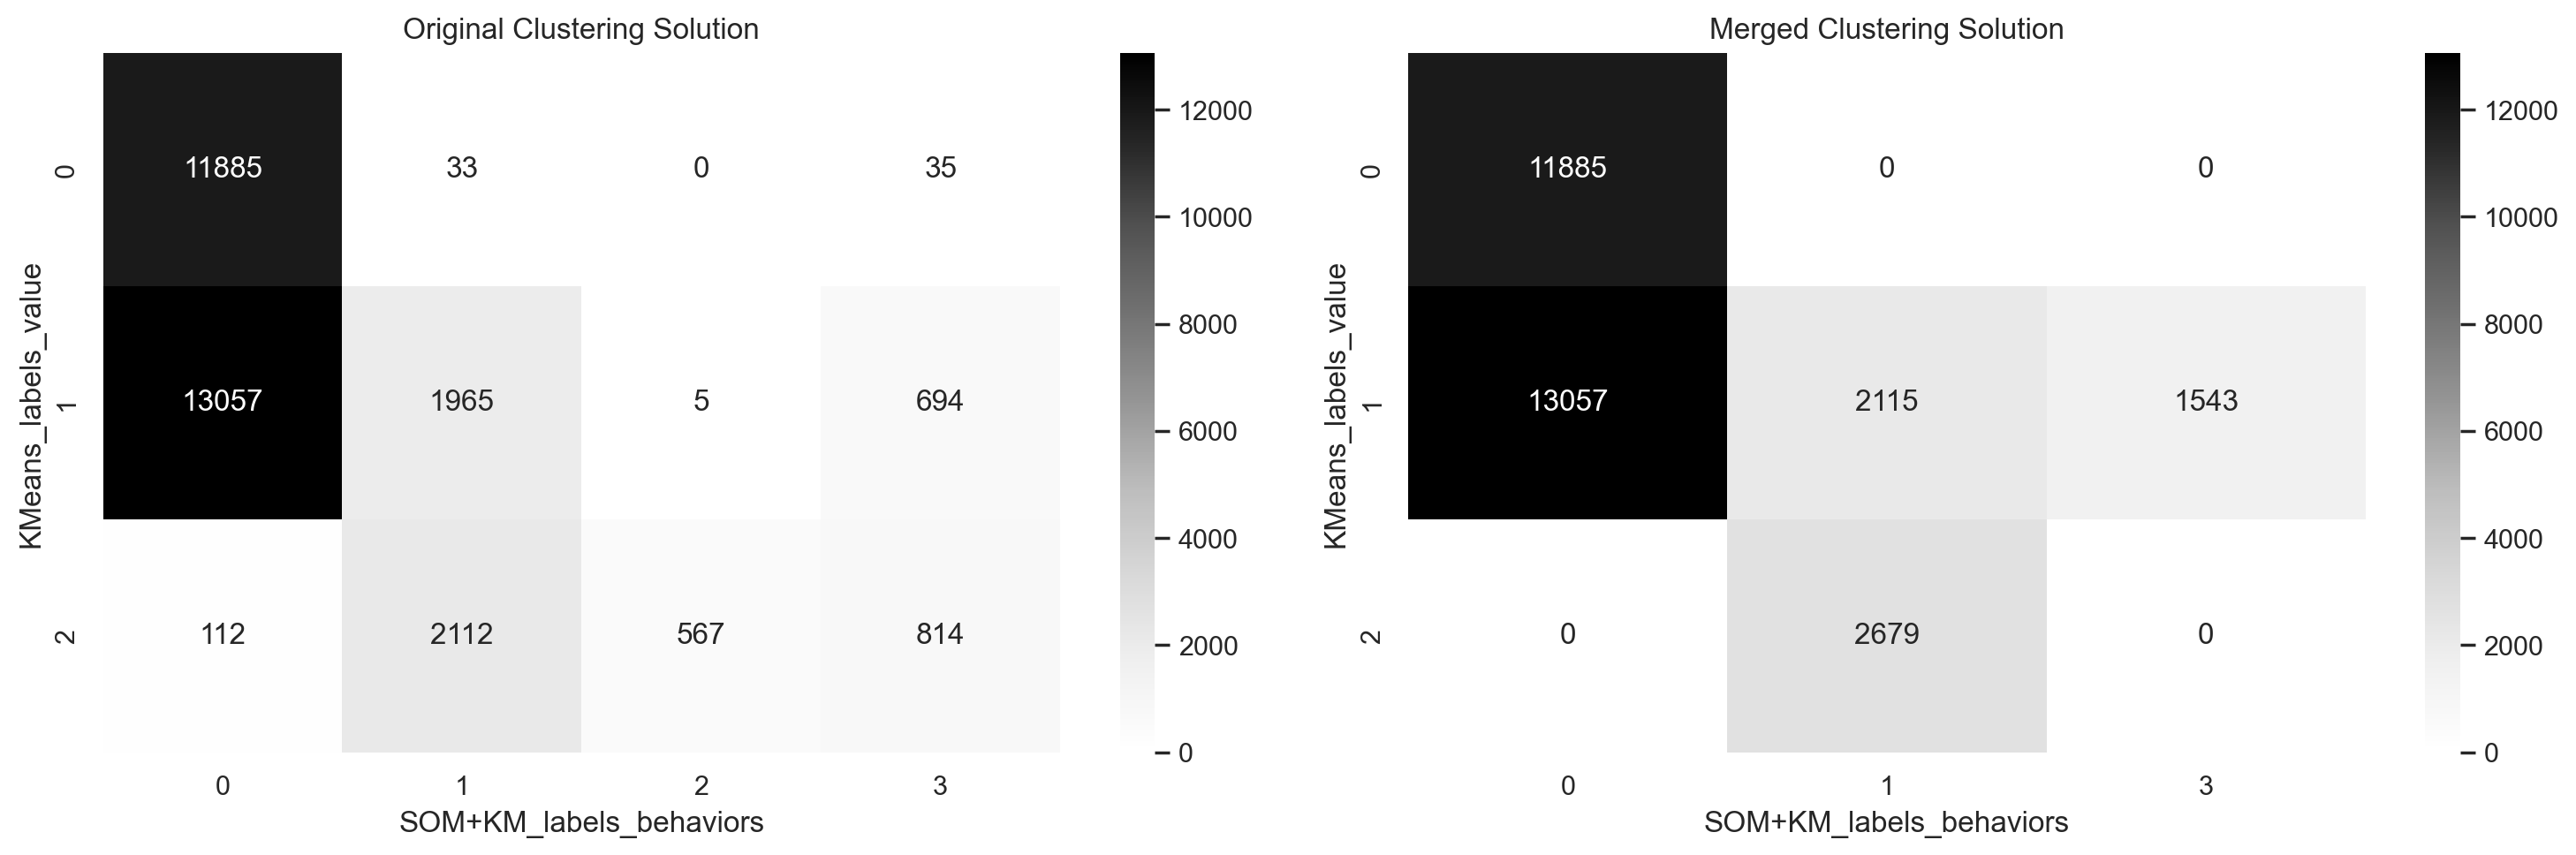

In [190]:
# Side by side comparison of the old and new clustering solutions
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(pd.crosstab(ABCDEats['KMeans_labels_value'], ABCDEats['SOM+KM_labels_behaviors']),
            annot=True, fmt='d', cmap='Greys', ax=ax[0])
ax[0].set_title('Original Clustering Solution')

sns.heatmap(pd.crosstab(df_['KMeans_labels_value'], df_['SOM+KM_labels_behaviors']),
            annot=True, fmt='d', cmap='Greys', ax=ax[1])
ax[1].set_title('Merged Clustering Solution')

plt.tight_layout()
plt.show()

In [213]:
# Mapping the merged clusters to a single label
df_['merged_labels'] = df_['KMeans_labels_value'].astype(str) + '_' + df_['SOM+KM_labels_behaviors'].astype(str)
df_['merged_labels'].value_counts()

# Rename the merged_labels to a single number starting from 0 to n_clusters - 1 (5 clusters)
df_['merged_labels'] = df_['merged_labels'].map({
    '1_0': 0, '0_0': 1, '2_1': 2, '1_1': 3, '1_3': 4
})

# Absolute and Relative Frequency of the merged clusters
pd.DataFrame({
    'n': df_['merged_labels'].value_counts(),
    '%': round(df_['merged_labels'].value_counts(normalize=True) * 100, 2)
})

n      %
merged_labels              
0              13057  41.74
1              11885  38.00
2               2679   8.56
3               2115   6.76
4               1543   4.93

---

### **Merging using `Hierarchical Clustering`**

In [191]:
# Check metric_features = value_vars + behavior_vars
len(metric_features)  == len(value_vars + behavior_vars)

True

In [192]:
# Centroids of the concatenated cluster labels
df_centroids = ABCDEats.groupby(['KMeans_labels_value', 'SOM+KM_labels_behaviors']) \
    [metric_features].mean()
df_centroids

chain_count  first_order  \
KMeans_labels_value SOM+KM_labels_behaviors                             
0                   0                          -0.524542     0.672061   
                    1                          -0.191354     0.164605   
                    3                          -0.343267     0.108800   
1                   0                          -0.121700    -0.268605   
                    1                           0.430761    -0.664102   
                    2                          -0.789063    -0.670781   
                    3                           0.075454    -0.605829   
2                   0                           0.924730    -0.345511   
                    1                           1.894354    -0.774288   
                    2                           3.679805    -0.938918   
                    3                           0.928476    -0.681067   

                                             last_order  order_count  \
KMeans_labels_value SOM+KM_labels_behaviors                            
0                   0                         -0.624504    -0.605996   
                    1                         -0.641163     0.140988   
                    3                         -0.467788     0.056073   
1                   0                          0.250959    -0.163344   
                    1                          0.541624     0.644225   
                    2                          0.995818     2.353739   
                    3                          0.597899     0.485273   
2                   0                          0.444425     0.806905   
                    1                          0.720803     1.810833   
                    2                          0.902871     4.296026   
                    3                          0.755195     1.674786   

                                             days_between_orders_per_order  \
KMeans_labels_value SOM+KM_labels_behaviors                                  
0                   0                                            -0.852104   
                    1                                            -0.643422   
                    3                                            -0.374069   
1                   0                                             0.827378   
                    1                                             0.149657   
                    2                                            -0.391121   
                    3                                             0.289581   
2                   0                                            -0.171203   
                    1                                            -0.280496   
                    2                                            -0.594862   
                    3                                            -0.228149   

                                             CUI_Total_Amount_Spent  \
KMeans_labels_value SOM+KM_labels_behaviors                           
0                   0                                     -0.435486   
                    1                                      0.157995   
                    3                                      1.585132   
1                   0                                     -0.187168   
                    1                                      0.267448   
                    2                                      2.008721   
                    3                                      1.305996   
2                   0                                      1.025098   
                    1                                      0.865538   
                    2                                      2.743325   
                    3                                      3.217043   

                                             CUI_Total_Food_Types  \
KMeans_labels_value SOM+KM_labels_behaviors                         
0                   0                                   -0.686443   
            

In [193]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)

hclust_labels = hclust.fit_predict(df_centroids)

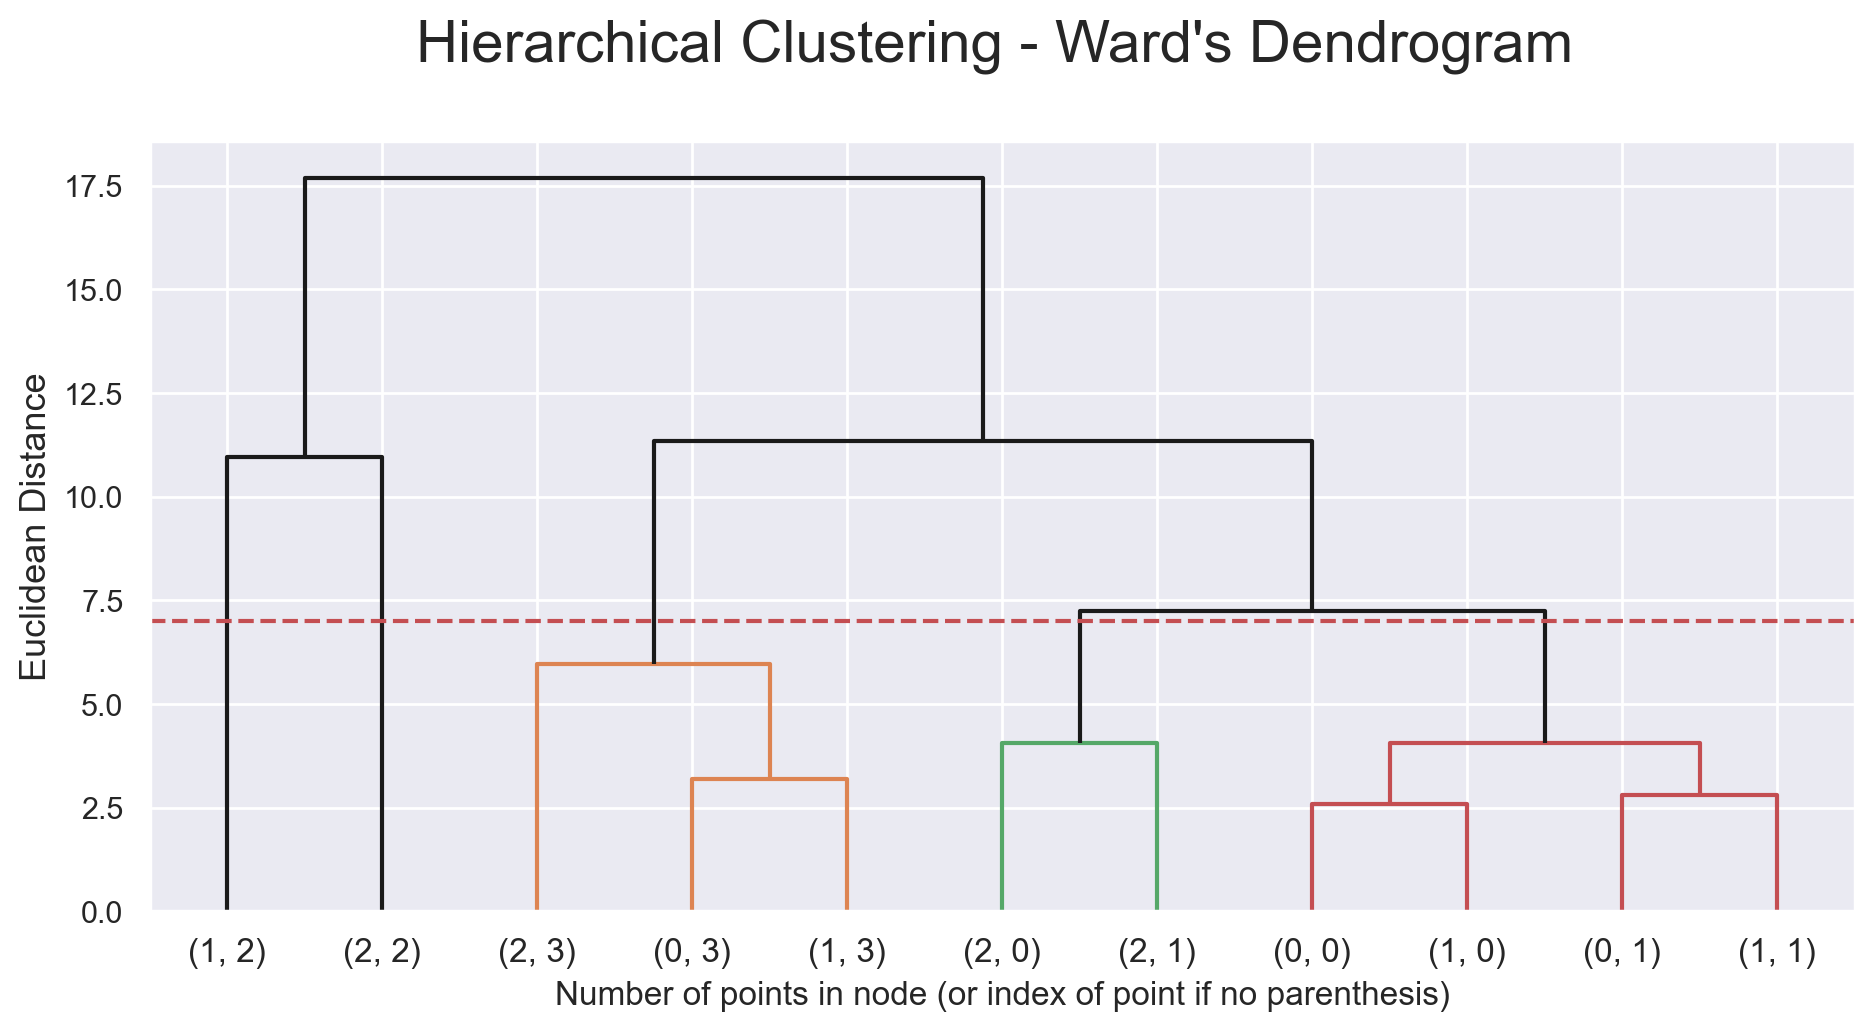

In [194]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# Create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned

y_threshold = 7

dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram \n', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [195]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=5
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

chain_count  first_order  \
KMeans_labels_value SOM+KM_labels_behaviors                             
0                   0                          -0.524542     0.672061   
                    1                          -0.191354     0.164605   
                    3                          -0.343267     0.108800   
1                   0                          -0.121700    -0.268605   
                    1                           0.430761    -0.664102   
                    2                          -0.789063    -0.670781   
                    3                           0.075454    -0.605829   
2                   0                           0.924730    -0.345511   
                    1                           1.894354    -0.774288   
                    2                           3.679805    -0.938918   
                    3                           0.928476    -0.681067   

                                             last_order  order_count  \
KMeans_labels_value SOM+KM_labels_behaviors                            
0                   0                         -0.624504    -0.605996   
                    1                         -0.641163     0.140988   
                    3                         -0.467788     0.056073   
1                   0                          0.250959    -0.163344   
                    1                          0.541624     0.644225   
                    2                          0.995818     2.353739   
                    3                          0.597899     0.485273   
2                   0                          0.444425     0.806905   
                    1                          0.720803     1.810833   
                    2                          0.902871     4.296026   
                    3                          0.755195     1.674786   

                                             days_between_orders_per_order  \
KMeans_labels_value SOM+KM_labels_behaviors                                  
0                   0                                            -0.852104   
                    1                                            -0.643422   
                    3                                            -0.374069   
1                   0                                             0.827378   
                    1                                             0.149657   
                    2                                            -0.391121   
                    3                                             0.289581   
2                   0                                            -0.171203   
                    1                                            -0.280496   
                    2                                            -0.594862   
                    3                                            -0.228149   

                                             CUI_Total_Amount_Spent  \
KMeans_labels_value SOM+KM_labels_behaviors                           
0                   0                                     -0.435486   
                    1                                      0.157995   
                    3                                      1.585132   
1                   0                                     -0.187168   
                    1                                      0.267448   
                    2                                      2.008721   
                    3                                      1.305996   
2                   0                                      1.025098   
                    1                                      0.865538   
                    2                                      2.743325   
                    3                                      3.217043   

                                             CUI_Total_Food_Types  \
KMeans_labels_value SOM+KM_labels_behaviors                         
0                   0                                   -0.686443   
            

In [196]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()
cluster_mapper


{(0, 0): 2,
 (0, 1): 2,
 (0, 3): 0,
 (1, 0): 2,
 (1, 1): 2,
 (1, 2): 3,
 (1, 3): 0,
 (2, 0): 1,
 (2, 1): 1,
 (2, 2): 4,
 (2, 3): 0}

In [197]:
df_HC = ABCDEats.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_HC['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['KMeans_labels_value'], row['SOM+KM_labels_behaviors'])
    ], axis=1
)

df_HC 

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360     -1.369832     -0.403188      -0.057759   
5d272b9dcb             8670     -1.514837     -0.403188      -0.597323   
f6d1b2ba63             4660      1.530270     -0.791802      -0.597323   
180c632ed8             4660     -0.499801     -0.403188      -0.417468   
4eb37a6705             4660     -1.079822     -0.403188      -0.057759   
...                     ...           ...           ...            ...   
f4e366c281             8670      0.370229     -0.791802      -0.777177   
f6b6709018             8670     -0.789811     -0.791802      -0.777177   
f74ad8ce3f             8670     -0.499801     -0.791802      -0.777177   
f7b19c0241             8670      0.950249     -0.791802      -0.777177   
fd40d3b0e0             4660      0.370229     -0.791802      -0.777177   

             chain_count  first_order  last_order last_promo payment_method  \
customer_id                                                                   
1b8f824d5e     -0.494669    -1.185756   -2.695230   DELIVERY           DIGI   
5d272b9dcb     -0.200275    -1.185756   -2.695230   DISCOUNT           DIGI   
f6d1b2ba63     -0.200275    -1.185756   -2.695230   DISCOUNT           CASH   
180c632ed8     -0.494669    -1.185756   -2.652110   DELIVERY           DIGI   
4eb37a6705     -0.789063    -1.185756   -2.652110   NO PROMO           DIGI   
...                  ...          ...         ...        ...            ...   
f4e366c281     -0.494669    -1.185756   -2.738349    FREEBIE           DIGI   
f6b6709018     -0.789063    -1.185756   -2.738349   DELIVERY           DIGI   
f74ad8ce3f     -0.494669    -1.185756   -2.738349   NO PROMO           DIGI   
f7b19c0241     -0.789063    -1.185756   -2.738349   DISCOUNT           DIGI   
fd40d3b0e0     -0.789063    -1.185756   -2.738349   NO PROMO           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e      -0.452244  -0.456181      -0.297860 -0.149594   
5d272b9dcb       0.803124  -0.151655      -0.297860 -0.149594   
f6d1b2ba63       0.448644  -0.456181      -0.297860 -0.149594   
180c632ed8      -0.452244   0.196715      -0.297860 -0.149594   
4eb37a6705       0.974489   1.491545      -0.297860 -0.149594   
...                   ...        ...            ...       ...   
f4e366c281      -0.452244  -0.456181       2.207522 -0.149594   
f6b6709018       1.314280  -0.456181      -0.297860 -0.149594   
f74ad8ce3f      -0.452244  -0.456181      -0.297860 -0.149594   
f7b19c0241      -0.452244   0.117128      -0.297860 -0.149594   
fd40d3b0e0      -0.452244  -0.456181      -0.297860 -0.149594   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e            -0.243423    -0.224882     -0.188975    -0.191447   
5d272b9dcb            -0.243423    -0.224882     -0.188975    -0.191447   
f6d1b2ba63            -0.243423    -0.224882     -0.188975    -0.191447   
180c632ed8            -0.243423    -0.224882     -0.188975    -0.191447   
4eb37a6705            -0.243423    -0.224882     -0.188975    -0.191447   
...                         ...          ...           ...          ...   
f4e366c281            -0.243423    -0.224882     -0.188975    -0.191447   
f6b6709018            -0.243423    -0.224882     -0.188975    -0.191447   
f74ad8ce3f            -0.243423    -0.224882      3.901674    -0.191447   
f7b19c0241            -0.243423    -0.224882     -0.188975    -0.191447   
fd40d3b0e0            -0.243423    -0.224882     -0.188975    -0.191447   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     4.780856    -0.308886     -0.330915   

In [198]:
# Merged cluster centroids
df_HC.groupby('merged_labels').mean(numeric_only=True)[metric_features]

chain_count  first_order  last_order  order_count  \
merged_labels                                                      
0                 0.515962    -0.629310    0.656706     1.103058   
1                 2.272238    -0.809131    0.759337     2.336814   
2                -0.254406     0.116003   -0.112635    -0.294280   

               days_between_orders_per_order  CUI_Total_Amount_Spent  \
merged_labels                                                          
0                                   0.001402                2.320488   
1                                  -0.347031                1.262964   
2                                   0.034281               -0.257382   

               CUI_Total_Food_Types  CUI_Avg_Amount_Spent  \
merged_labels                                               
0                          0.715165              0.609101   
1                          2.053212             -0.525228   
2                         -0.244079              0.017269   

               CUI_NOTAsian_Italian_OTHER_NOTSnack_PC  \
merged_labels                                           
0                                           -2.394901   
1                                            1.639345   
2                                           -0.025741   

               CUI_American_Cafe_Japanese_PC  CUI_Chicken_Chinese_Noodle_PC  \
merged_labels                                                                 
0                                   1.768906                       1.459049   
1                                   0.744566                       1.516578   
2                                  -0.174599                      -0.233368   

               CUI_Healthy_NOTAmerican_PC  CUI_Indian_PC  \
merged_labels                                              
0                               -0.235221       0.351702   
1                               -0.291374       0.133181   
2                                0.042264      -0.033243   

               CUI_Japanese_NOTBeverages_PC  CUI_Beverages_Thai_PC    Sunday  \
merged_labels                                                                  
0                                 -0.137751               0.014036  0.776351   
1                                 -0.154073              -0.089537  1.455053   
2                                  0.023111               0.008065 -0.188343   

                 Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
merged_labels                                                                
0              0.828291  0.794981   0.735601  0.595075  0.560407  0.514740   
1              1.466374  1.465973   1.508627  1.480651  1.345253  1.388827   
2             -0.192426 -0.190487  -0.191324 -0.180540 -0.165157 -0.166867   

               HR_Lunch_Dinner_PC  HR_LateNight_Breakfast_PC  HR_Evening_PC  \
merged_labels                                                                 
0                       -1.136268                   3.943158      -0.187007   
1                        3.816918                   0.948725      -0.155470   
2                       -0.313126                  -0.318806       0.026058   

               HR_AfternoonSnack_PC  
merged_labels                        
0                          0.178259  
1                          0.072684  
2                         -0.017362

In [199]:
# Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_HC.groupby('merged_labels')\
    .size()\
    .to_frame()

df_counts

0
merged_labels       
0               1543
1               2679
2              27057

In [200]:
# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts


merged_labels      0
0        (2, 3)   1543
1        (2, 1)   2679
2        (1, 1)  27057

In [201]:
df_counts['behavior_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['product_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts

merged_labels      0  behavior_labels  product_labels
0        (2, 3)   1543                2               3
1        (2, 1)   2679                2               1
2        (1, 1)  27057                1               1

In [202]:
df_counts.pivot(values=0, index='behavior_labels', columns='product_labels')

product_labels         1       3
behavior_labels                 
1                27057.0     NaN
2                 2679.0  1543.0

> We choose the 1st cluster merge approach

In [214]:
# Save the merged cluster labels of the 1st clustering solution
ABCDEats['merged_labels'] = df_['merged_labels']

---

## **Cluster Analysis**

In [233]:
def cluster_profiles(df, label_columns, figsize, 
                     cmap="tab10",
                     compare_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    
    if compare_titles == None:
        compare_titles = [""]*len(label_columns)
        
    fig, axes = plt.subplots(nrows=len(label_columns), 
                             ncols=2, 
                             figsize=figsize, 
                             constrained_layout=True,
                             squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compare_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, 
                                        label, 
                                        color = sns.color_palette(cmap),
                                        ax=ax[0])
        
        # Add barplot
        sns.barplot(x=label, 
                    hue=label,
                    y="counts", 
                    data=counts, 
                    ax=ax[1], 
                    palette=sns.color_palette(cmap),
                    legend=False
                    )
        
                # Add % to the barplot
        total = len(df)
        for p in ax[1].patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height() + 0.15
            ax[1].annotate(percentage, (x, y), size = 12)

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha='right')
        
        ax[0].legend(handles, cluster_labels,
                     loc='center left', bbox_to_anchor=(1, 0.5), title=titl)
        
        ax[1].set_xticks([i for i in range(len(handles))])
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
        
        
    
    # plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profiling\n", fontsize=23, fontweight = 'bold')
    plt.show()

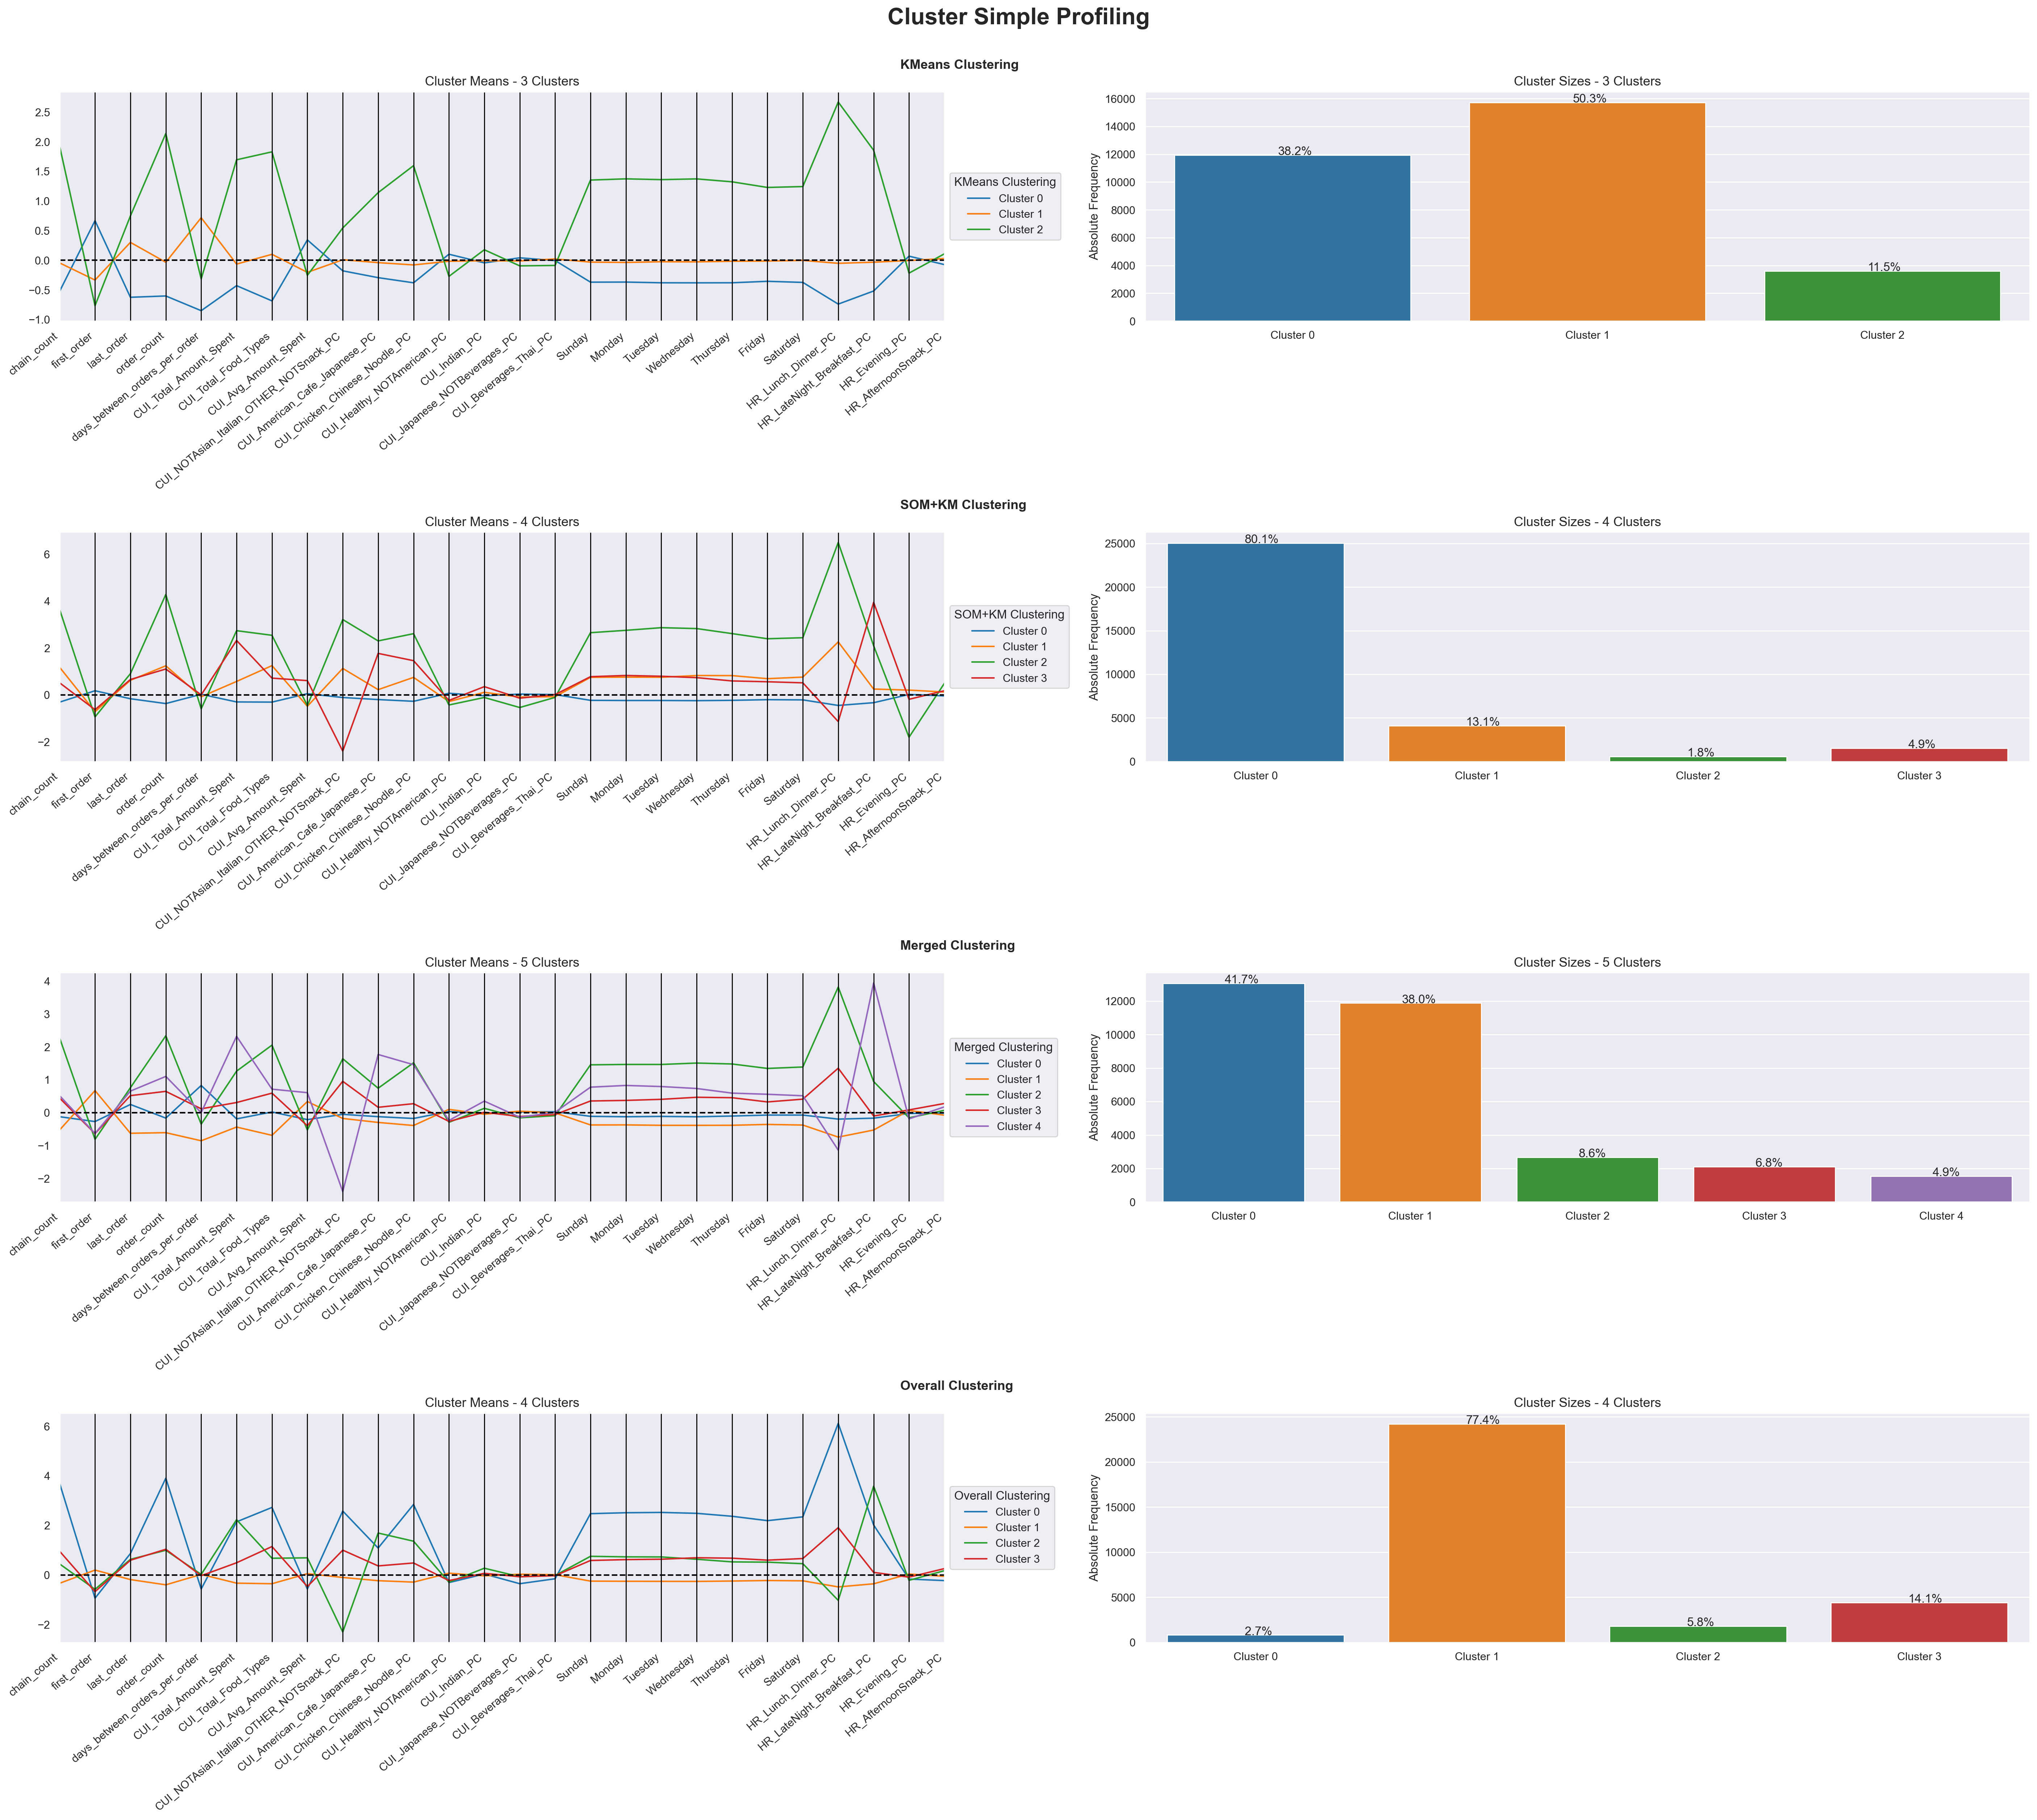

In [ ]:
# Disabling the UserWarning
import warnings
warnings.filterwarnings('ignore')

# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = ABCDEats[metric_features + ['merged_labels', 'KMeans_labels_value', 'SOM+KM_labels_behaviors', 'SOM+KM_labels']],
    label_columns = ['KMeans_labels_value', 'SOM+KM_labels_behaviors', 'merged_labels', 'SOM+KM_labels'],
    figsize = (28, 25), 
    compare_titles = ["KMeans Clustering", "SOM+KM Clustering", "Merged Clustering", "Overall Clustering"]
)

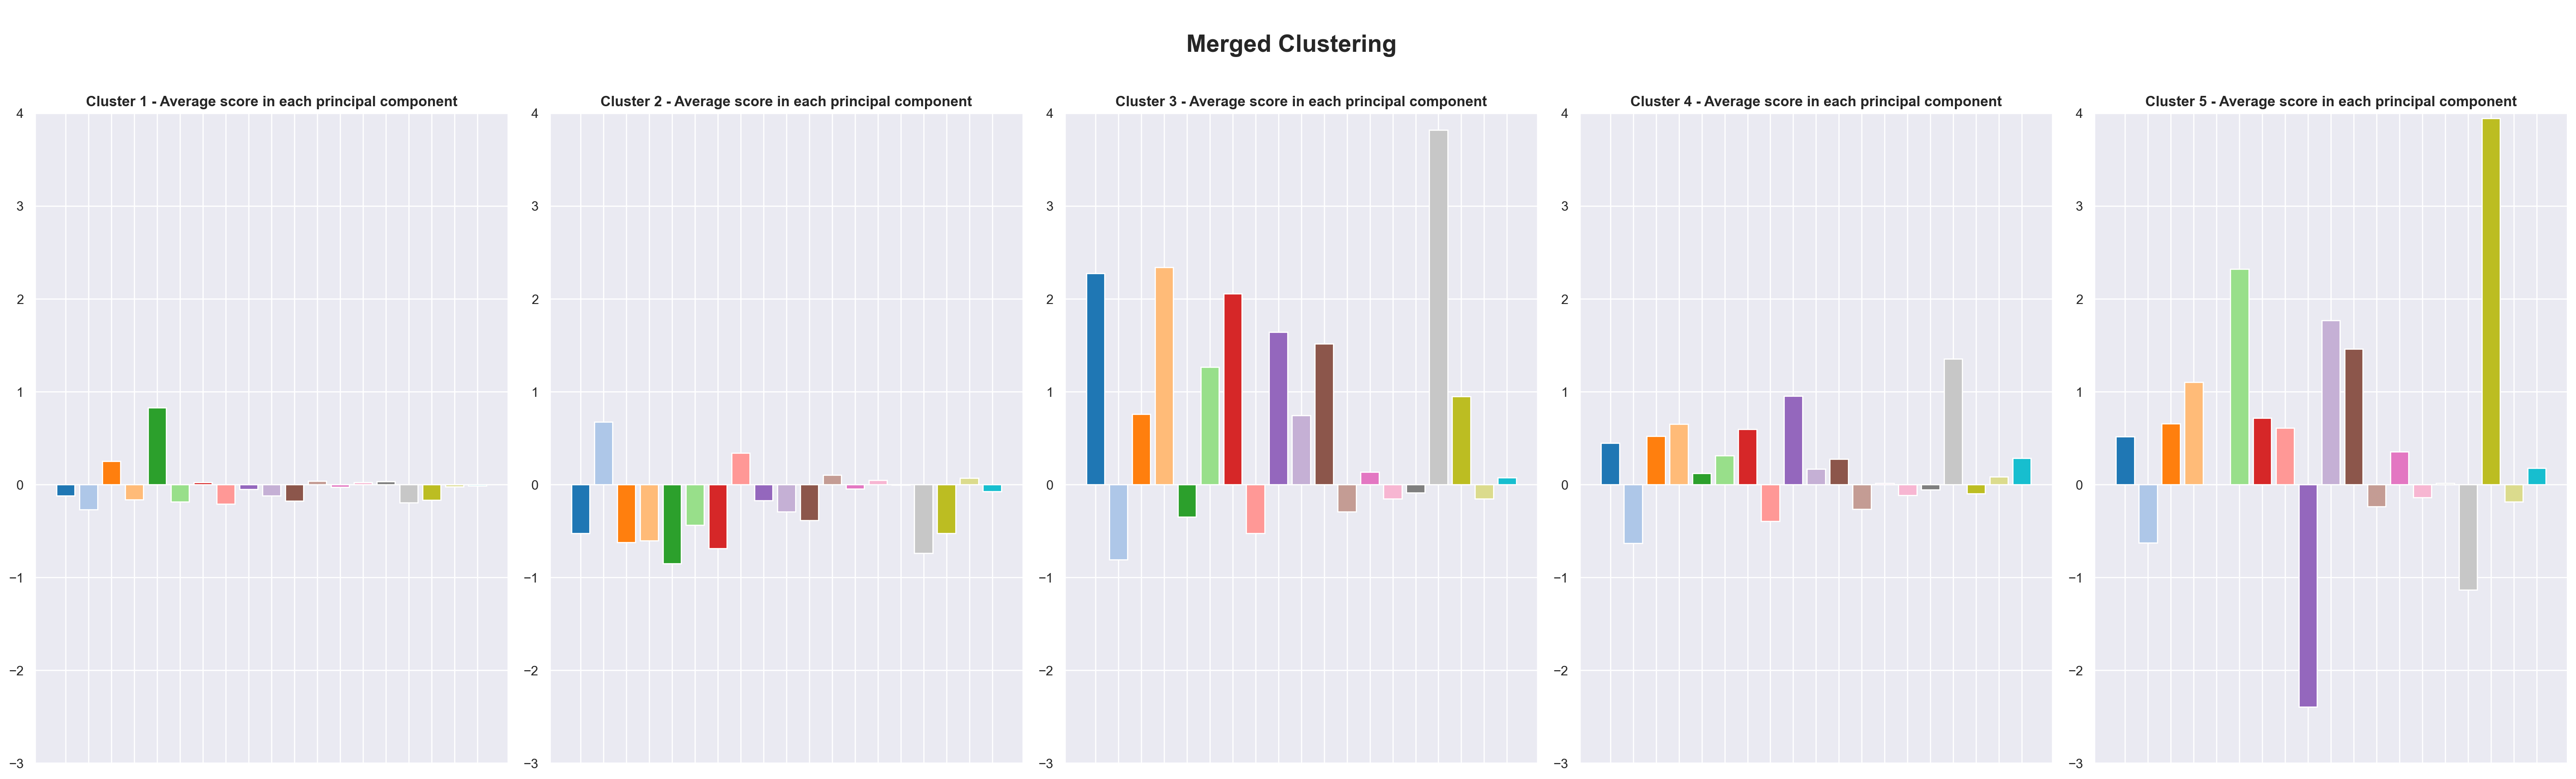

In [ ]:
# label_columns = ['KMeans_labels_value', 'SOM+KM_labels_behaviors', 'merged_labels', 'SOM+KM_labels']
# compare_titles = ["KMeans Clustering", "SOM+KM Clustering", "Merged Clustering", "Overall Clustering"]

label_columns = ['merged_labels']
compare_titles = ["Merged Clustering"]
figsize = (30, 25)


metric_features_prof = [
    # 'vendor_count', 'product_count', 'days_between_orders' -> removed due to multicollinearity
    'chain_count', 'first_order', 'last_order',
    'order_count', 
    'days_between_orders_per_order',
    'CUI_Total_Amount_Spent',
    'CUI_Total_Food_Types',
    'CUI_Avg_Amount_Spent',
    
    # Principal Components [CUI] 
    'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 
    'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',

    # Original [DOW]
    # 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    
    # Principal Components [HR]
    'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'
]


def cluster_profiles(df, label_columns, figsize, compare_titles):
    for idx, label_col in enumerate(label_columns):
        #Get max number of clusters
        num_clusters = df[label_col].nunique()
        
        # Calculate mean for each metric feature by cluster
        cluster_means = df.groupby(label_col)[metric_features_prof].mean()

        # Create the plot with the desired layout
        fig, axes = plt.subplots(nrows = (num_clusters + 1) // 2,
                                 ncols = num_clusters if num_clusters > 1 else 1,
                                 figsize = figsize,
                                 tight_layout=True)

        axes = axes.flatten() if num_clusters > 1 else [axes] #ensure axes is a list even if only 1 axis

        # Define color palette
        num_features = len(metric_features_prof)
        colors = sns.color_palette('tab20', num_features)


        # Loop through axes to create the plots for the specified label column
        for i in range(num_clusters):
            ax = axes[i]
            
            #Filter the data based on cluster
            cluster_data = cluster_means.loc[i]

            # Generate barplot with colors
            bars = ax.bar(cluster_data.index, cluster_data.values, color = colors)
            
            ax.set_title(f"Cluster {i+1} - Average score in each principal component", fontweight='bold')
            ax.set_xlabel("")
            ax.set_ylabel("")
            ax.set_ylim(-3, 4) # set the limit of the y axis
            ax.tick_params(axis='x', which='both', length=0, labelbottom = False)
        
        # Place legend outside of all subplots, next to the last subplot
        if num_clusters > 0:
            last_ax = axes[-1]
            last_ax.legend(bars, cluster_means.columns, title="Features", loc='center left', bbox_to_anchor=(1.1, 0.5))

        # Delete unused subplots if any
        for j in range(num_clusters, len(axes)):
            fig.delaxes(axes[j])
             
        # Set overall figure title using the compare_titles list
        fig.suptitle(f" \n {compare_titles[idx]}\n\n", fontsize=20, fontweight='bold')        
        plt.show()
        
cluster_profiles(df, label_columns, figsize, compare_titles)

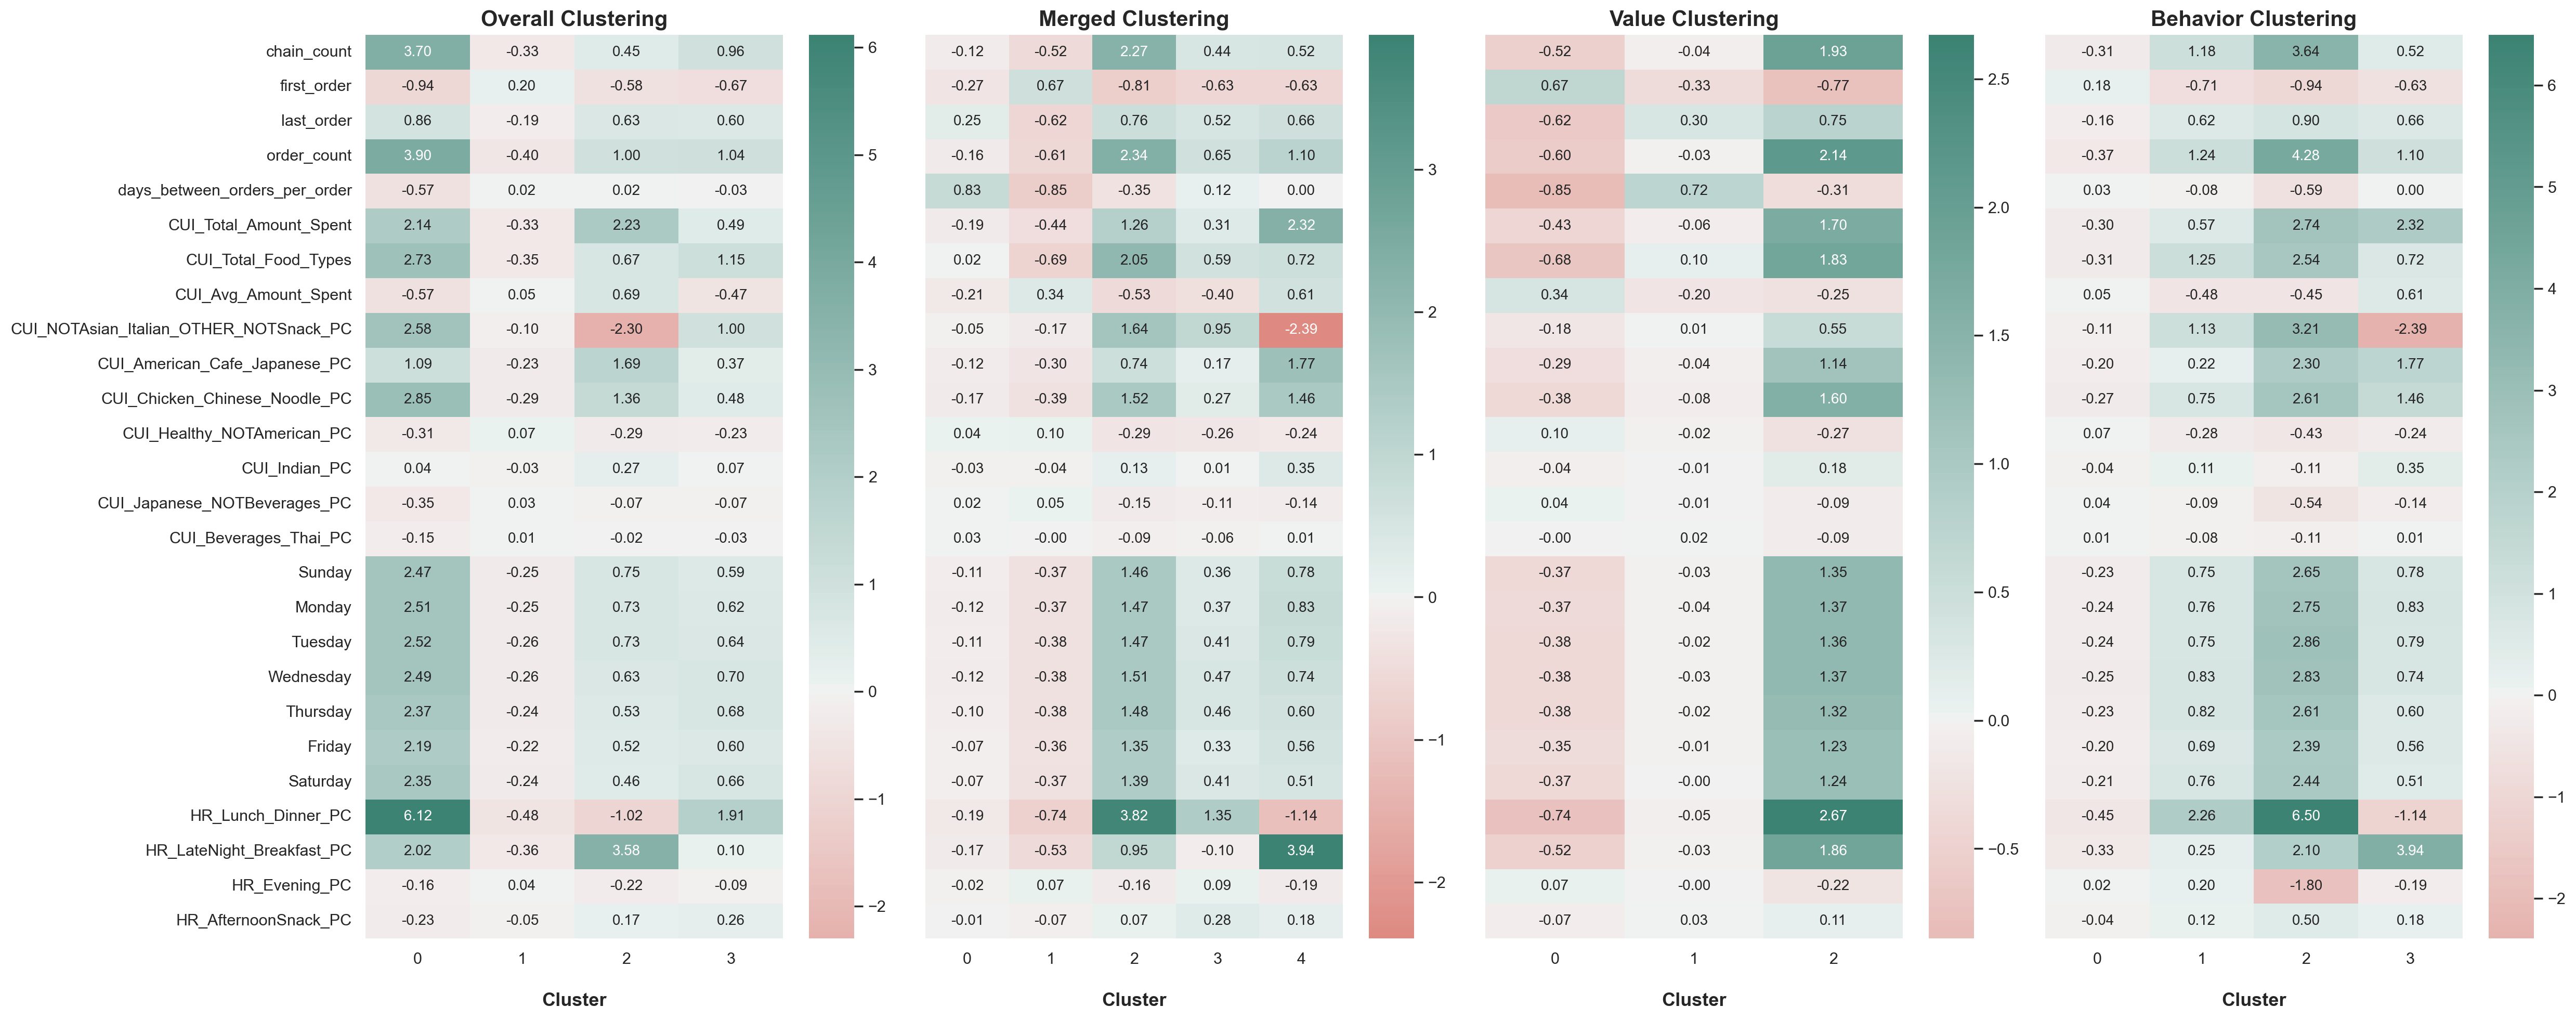

In [268]:
### Visualize the cluster means as a heatmap to the population means. [All + Value + Behavior] side by side
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 10), sharey=True)


# Color palette for the heatmap with center = 0 (white)
cmap_ = sns.diverging_palette(15, 530, as_cmap=True)

# Plot the heatmap for the overall clustering
sns.heatmap(ABCDEats.groupby('SOM+KM_labels')[metric_features].mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax[0], annot_kws={"size": 10})
ax[0].set_title('Overall Clustering', fontsize=15, fontweight='bold')

# Plot the heatmap for the merged clustering
sns.heatmap(ABCDEats.groupby('merged_labels')[metric_features].mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax[1], annot_kws={"size": 10})
ax[1].set_title('Merged Clustering', fontsize=15, fontweight='bold')

# Plot the heatmap for the value clustering
sns.heatmap(ABCDEats.groupby('KMeans_labels_value')[metric_features].mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax[2], annot_kws={"size": 10})
ax[2].set_title('Value Clustering', fontsize=15, fontweight='bold')

# Plot the heatmap for the behavior clustering
sns.heatmap(ABCDEats.groupby('SOM+KM_labels_behaviors')[metric_features].mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax[3], annot_kws={"size": 10})
ax[3].set_title('Behavior Clustering', fontsize=15, fontweight='bold')

# Finalize the plot
for i in range(4):
    ax[i].set_xlabel('\nCluster', fontsize=13, fontweight='bold')
    ax[i].tick_params(axis='both', which='major', labelsize=11)
    
plt.tight_layout()
fig.savefig('./Clustering_Outputs/Heatmap_ClusterProfiling.png')
plt.show()

In [269]:
ABCDEats.groupby('merged_labels')[metric_features].mean().T

merged_labels                                  0         1         2  \
chain_count                            -0.121700 -0.524542  2.272238   
first_order                            -0.268605  0.672061 -0.809131   
last_order                              0.250959 -0.624504  0.759337   
order_count                            -0.163344 -0.605996  2.336814   
days_between_orders_per_order           0.827378 -0.852104 -0.347031   
CUI_Total_Amount_Spent                 -0.187168 -0.435486  1.262964   
CUI_Total_Food_Types                    0.022713 -0.686443  2.053212   
CUI_Avg_Amount_Spent                   -0.209606  0.340335 -0.525228   
CUI_NOTAsian_Italian_OTHER_NOTSnack_PC -0.049351 -0.174221  1.639345   
CUI_American_Cafe_Japanese_PC          -0.119980 -0.295058  0.744566   
CUI_Chicken_Chinese_Noodle_PC          -0.174826 -0.388093  1.516578   
CUI_Healthy_NOTAmerican_PC              0.037252  0.102126 -0.291374   
CUI_Indian_PC                          -0.030237 -0.044795  0.133181   
CUI_Japanese_NOTBeverages_PC            0.023970  0.046660 -0.154073   
CUI_Beverages_Thai_PC                   0.030167 -0.004646 -0.089537   
Sunday                                 -0.109866 -0.371513  1.455053   
Monday                                 -0.122671 -0.369846  1.466374   
Tuesday                                -0.112089 -0.382898  1.465973   
Wednesday                              -0.123323 -0.383544  1.508627   
Thursday                               -0.100714 -0.381562  1.480651   
Friday                                 -0.071549 -0.355669  1.345253   
Saturday                               -0.071596 -0.374550  1.388827   
HR_Lunch_Dinner_PC                     -0.193984 -0.740442  3.816918   
HR_LateNight_Breakfast_PC              -0.165538 -0.526064  0.948725   
HR_Evening_PC                          -0.021940  0.068242 -0.155470   
HR_AfternoonSnack_PC                   -0.014200 -0.073952  0.072684   

merged_labels                                  3         4  
chain_count                             0.444329  0.515962  
first_order                            -0.634317 -0.629310  
last_order                              0.519095  0.656706  
order_count                             0.649029  1.103058  
days_between_orders_per_order           0.119013  0.001402  
CUI_Total_Amount_Spent                  0.309978  2.320488  
CUI_Total_Food_Types                    0.594679  0.715165  
CUI_Avg_Amount_Spent                   -0.397547  0.609101  
CUI_NOTAsian_Italian_OTHER_NOTSnack_PC  0.954385 -2.394901  
CUI_American_Cafe_Japanese_PC           0.165125  1.768906  
CUI_Chicken_Chinese_Noodle_PC           0.274686  1.459049  
CUI_Healthy_NOTAmerican_PC             -0.263180 -0.235221  
CUI_Indian_PC                           0.013107  0.351702  
CUI_Japanese_NOTBeverages_PC           -0.114520 -0.137751  
CUI_Beverages_Thai_PC                  -0.056950  0.014036  
Sunday                                  0.356476  0.776351  
Monday                                  0.373931  0.828291  
Tuesday                                 0.406758  0.794981  
Wednesday                               0.469033  0.735601  
Thursday                                0.456271  0.595075  
Friday                                  0.327517  0.560407  
Saturday                                0.412029  0.514740  
HR_Lunch_Dinner_PC                      1.352593 -1.136268  
HR_LateNight_Breakfast_PC              -0.100340  3.943158  
HR_Evening_PC                           0.085327 -0.187007  
HR_AfternoonSnack_PC                    0.281109  0.178259

### **Profiling with unused / Categorical features**

In [239]:
not_used_features_non_metric

['customer_region_buckets',
 'customer_region',
 'last_promo',
 'last_promo_bin',
 'payment_method',
 'CUI_Most_Spent_Cuisine']

In [241]:
# customer_region_buckets | last_promo | payment_method | CUI_Most_Spent_Cuisine
ABCDEats[['customer_region_buckets', 'last_promo', 'payment_method', 'CUI_Most_Spent_Cuisine']]

customer_region_buckets last_promo payment_method  \
customer_id                                                     
1b8f824d5e                        2   DELIVERY           DIGI   
5d272b9dcb                        8   DISCOUNT           DIGI   
f6d1b2ba63                        4   DISCOUNT           CASH   
180c632ed8                        4   DELIVERY           DIGI   
4eb37a6705                        4   NO PROMO           DIGI   
...                             ...        ...            ...   
f4e366c281                        8    FREEBIE           DIGI   
f6b6709018                        8   DELIVERY           DIGI   
f74ad8ce3f                        8   NO PROMO           DIGI   
f7b19c0241                        8   DISCOUNT           DIGI   
fd40d3b0e0                        4   NO PROMO           CASH   

            CUI_Most_Spent_Cuisine  
customer_id                         
1b8f824d5e                  Indian  
5d272b9dcb                American  
f6d1b2ba63                American  
180c632ed8                  Indian  
4eb37a6705                   Asian  
...                            ...  
f4e366c281               Beverages  
f6b6709018                American  
f74ad8ce3f                Desserts  
f7b19c0241                   Asian  
fd40d3b0e0                 Italian  

[31279 rows x 4 columns]

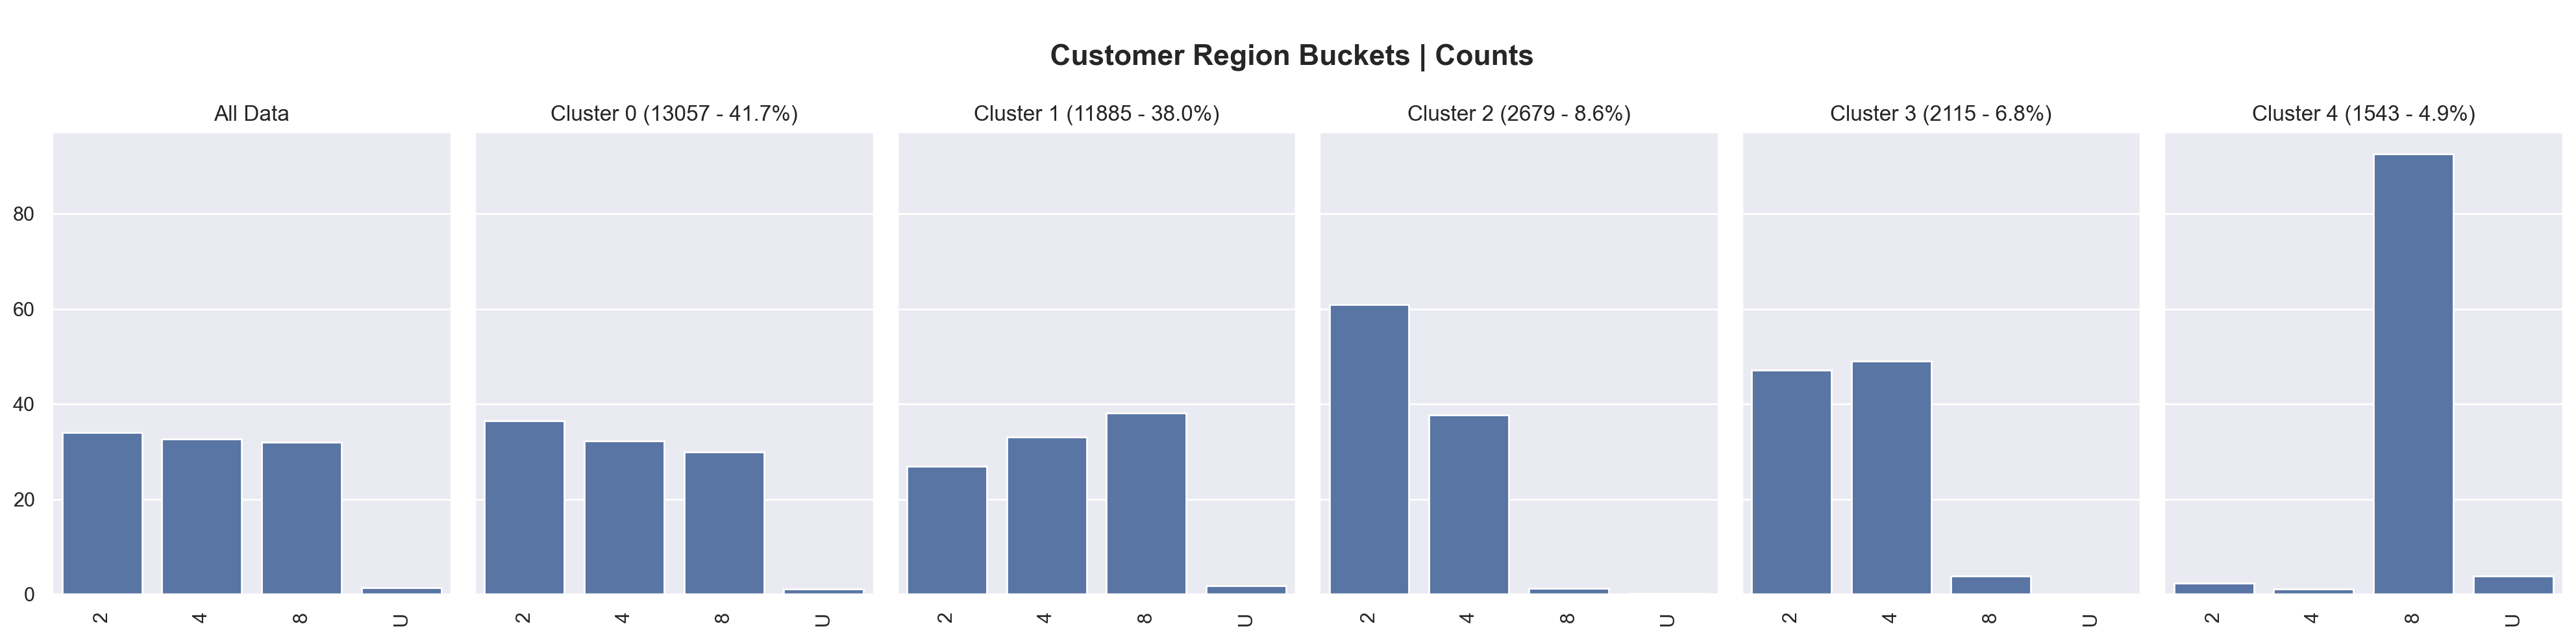

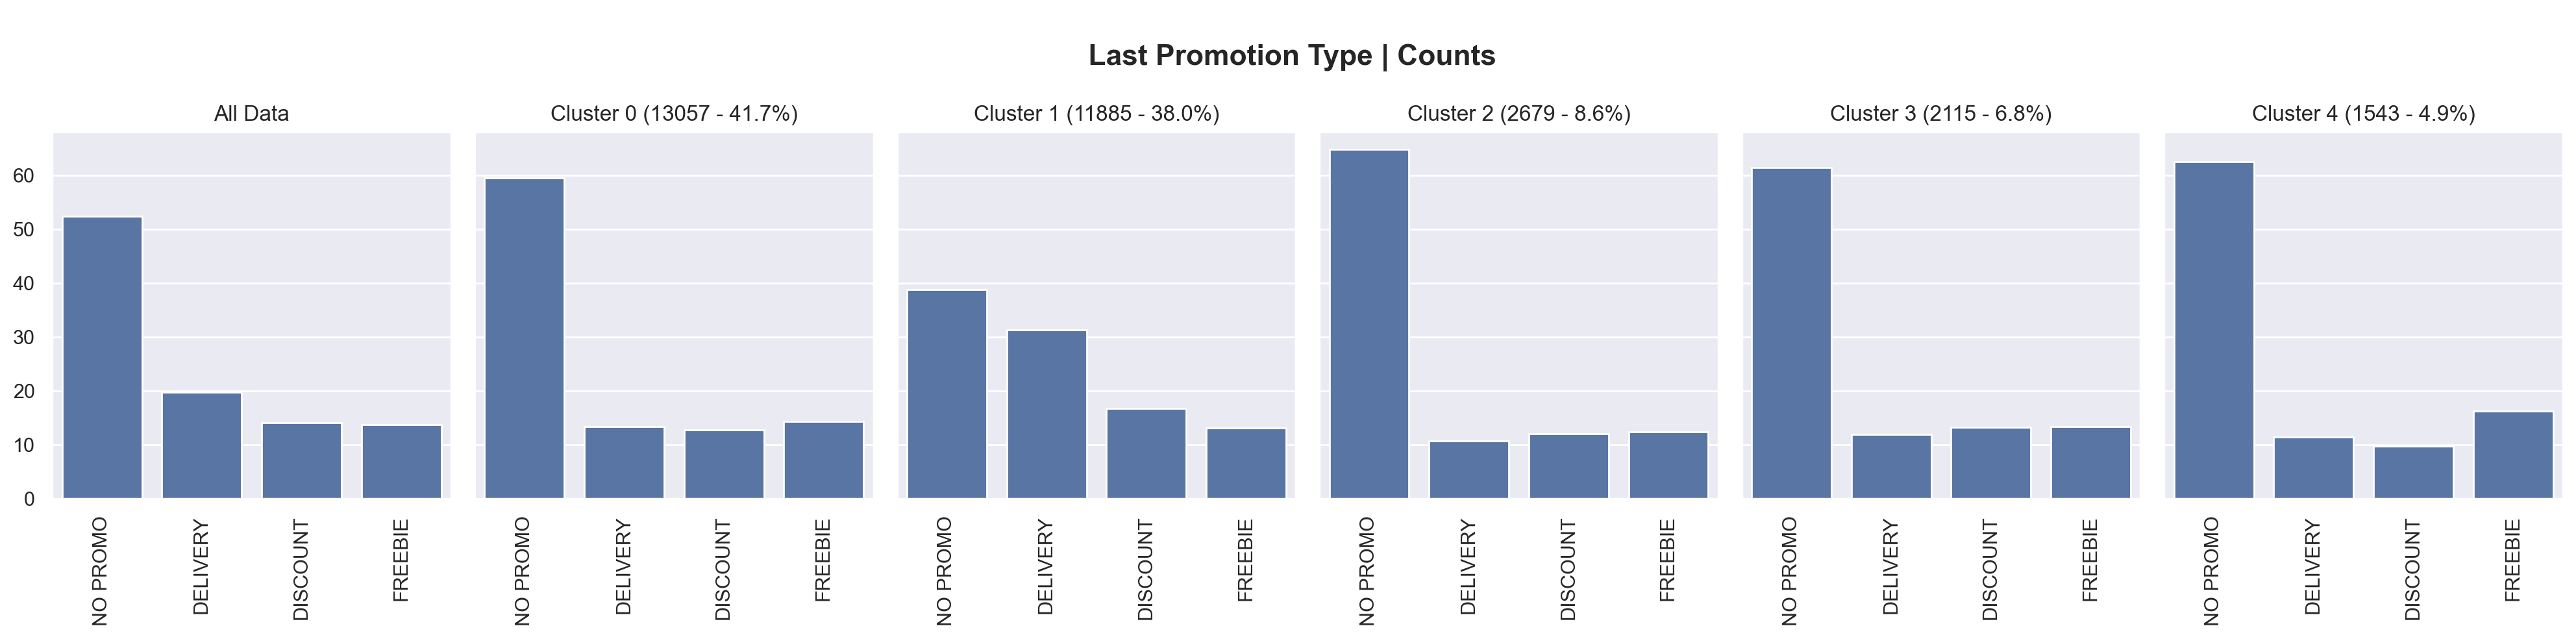

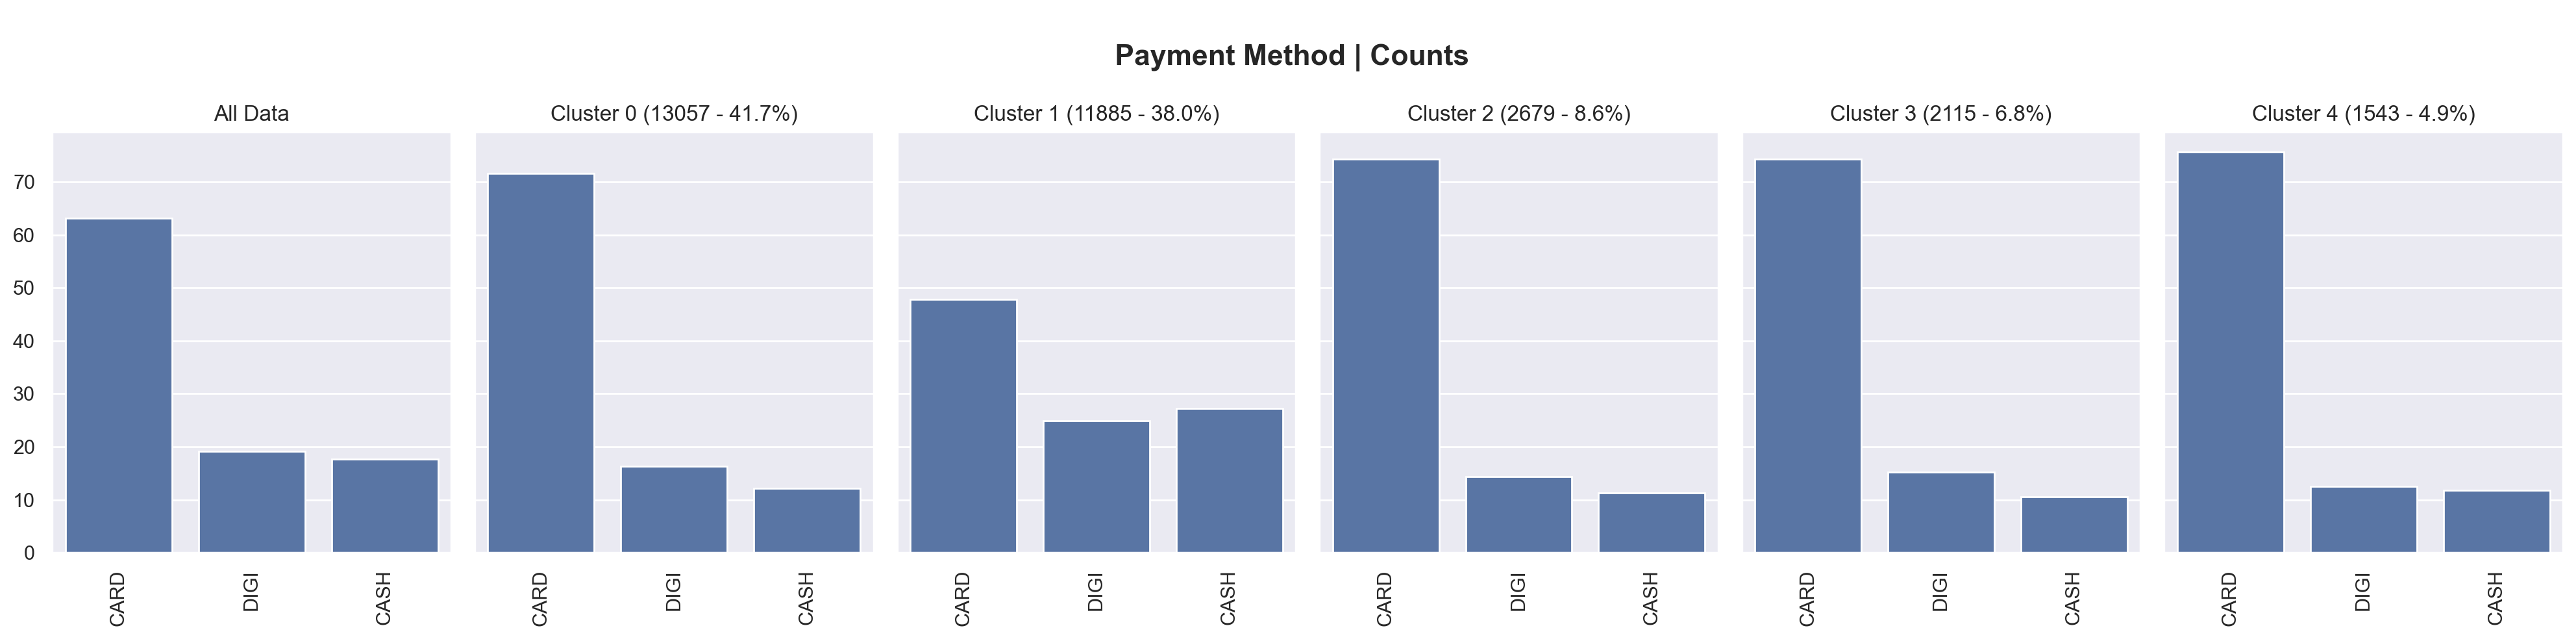

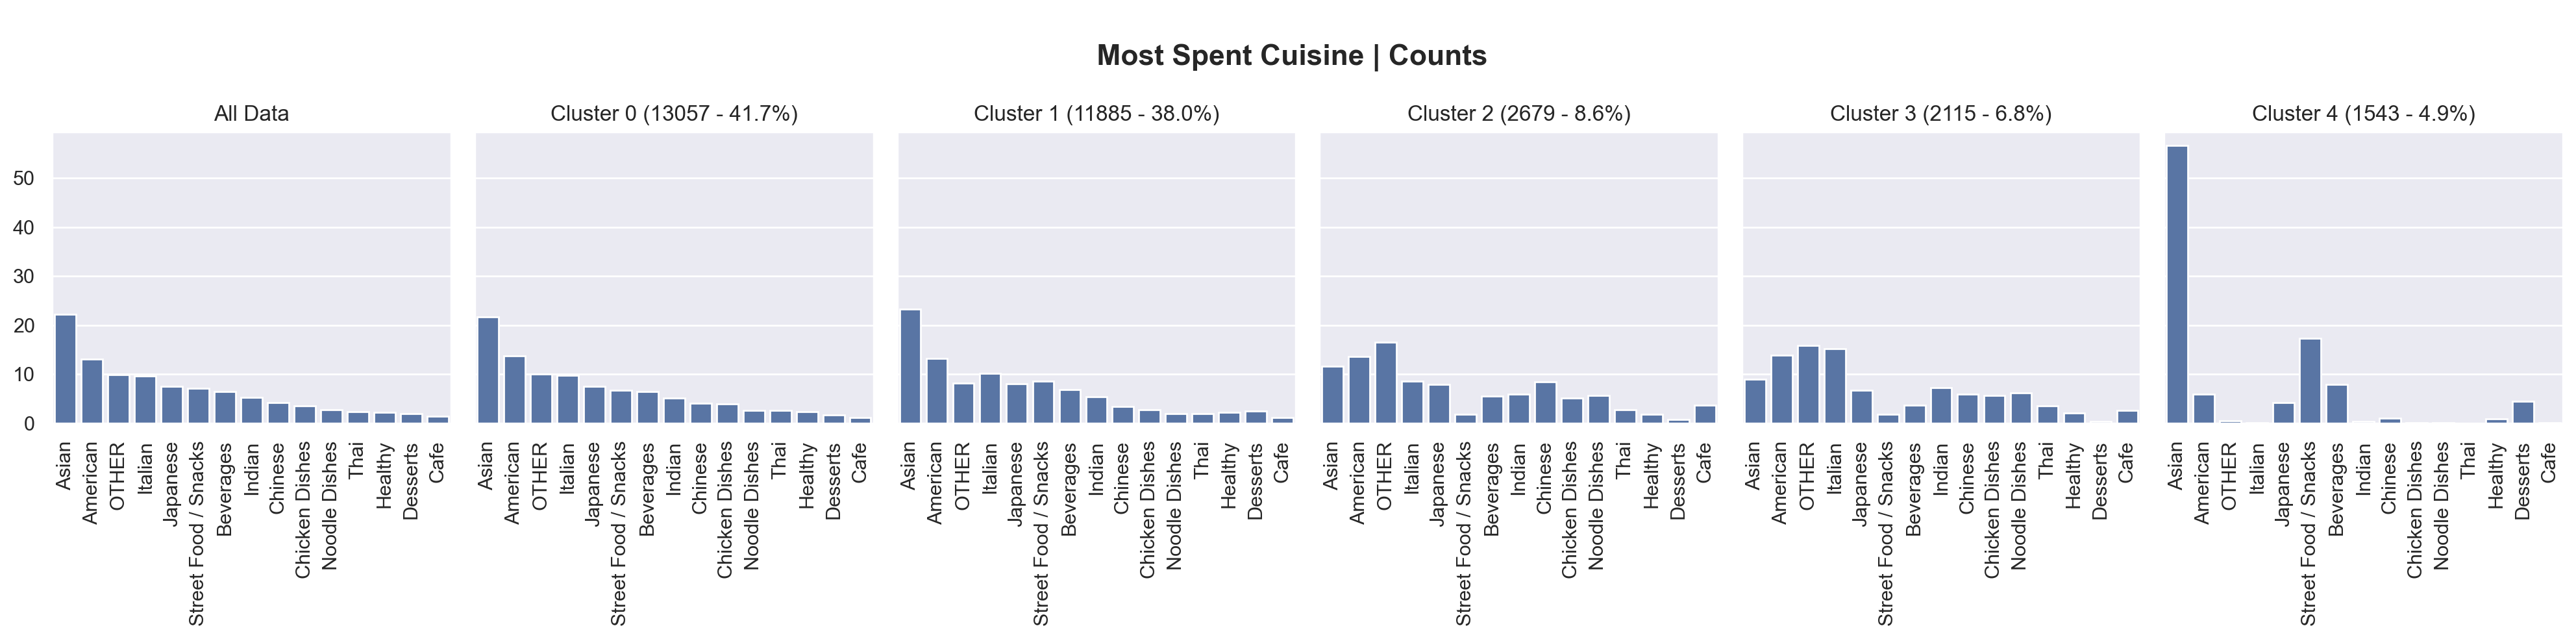

In [246]:
df = ABCDEats.copy()

# Define human-readable titles for columns
column_titles = {
    'customer_region_buckets': 'Customer Region Buckets',
    'last_promo': 'Last Promotion Type',
    'payment_method': 'Payment Method',
    'CUI_Most_Spent_Cuisine': 'Most Spent Cuisine'
}

categorical_cols = ['customer_region_buckets', 'last_promo', 'payment_method', 'CUI_Most_Spent_Cuisine']

for col in categorical_cols:
    fig, axes = plt.subplots(1, df['merged_labels'].nunique() + 1, figsize=(20, 5), tight_layout=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        if i == 0:
            sns.countplot(df, x=col, order=df[col].value_counts().index, ax=ax, stat='percent')
            ax.set_title("All Data")

        else:
            cluster_data = df.loc[df['merged_labels'] == i - 1]
            cluster_count = len(cluster_data)
            cluster_percentage = (cluster_count / len(df)) * 100

            sns.countplot(cluster_data, x=col, order=df[col].value_counts().index, ax=ax, stat='percent')
            ax.set_title(f"Cluster {i-1} ({cluster_count} - {cluster_percentage:.1f}%)")

        ax.tick_params(axis="x", labelrotation=90)
        ax.set_xlabel("")
        ax.set_ylabel("")
        
    fig.suptitle(f" \n {column_titles[col]} | Counts", fontsize=16, fontweight='bold')
    plt.show()

---

### **Cluster visualization using `t-SNE`**

In [304]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42, verbose=1).fit_transform(df[metric_features])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 31279 samples in 0.004s...
[t-SNE] Computed neighbors for 31279 samples in 1.002s...
[t-SNE] Computed conditional probabilities for sample 1000 / 31279
[t-SNE] Computed conditional probabilities for sample 2000 / 31279
[t-SNE] Computed conditional probabilities for sample 3000 / 31279
[t-SNE] Computed conditional probabilities for sample 4000 / 31279
[t-SNE] Computed conditional probabilities for sample 5000 / 31279
[t-SNE] Computed conditional probabilities for sample 6000 / 31279
[t-SNE] Computed conditional probabilities for sample 7000 / 31279
[t-SNE] Computed conditional probabilities for sample 8000 / 31279
[t-SNE] Computed conditional probabilities for sample 9000 / 31279
[t-SNE] Computed conditional probabilities for sample 10000 / 31279
[t-SNE] Computed conditional probabilities for sample 11000 / 31279
[t-SNE] Computed conditional probabilities for sample 12000 / 31279
[t-SNE] Computed conditional probabilities for sam

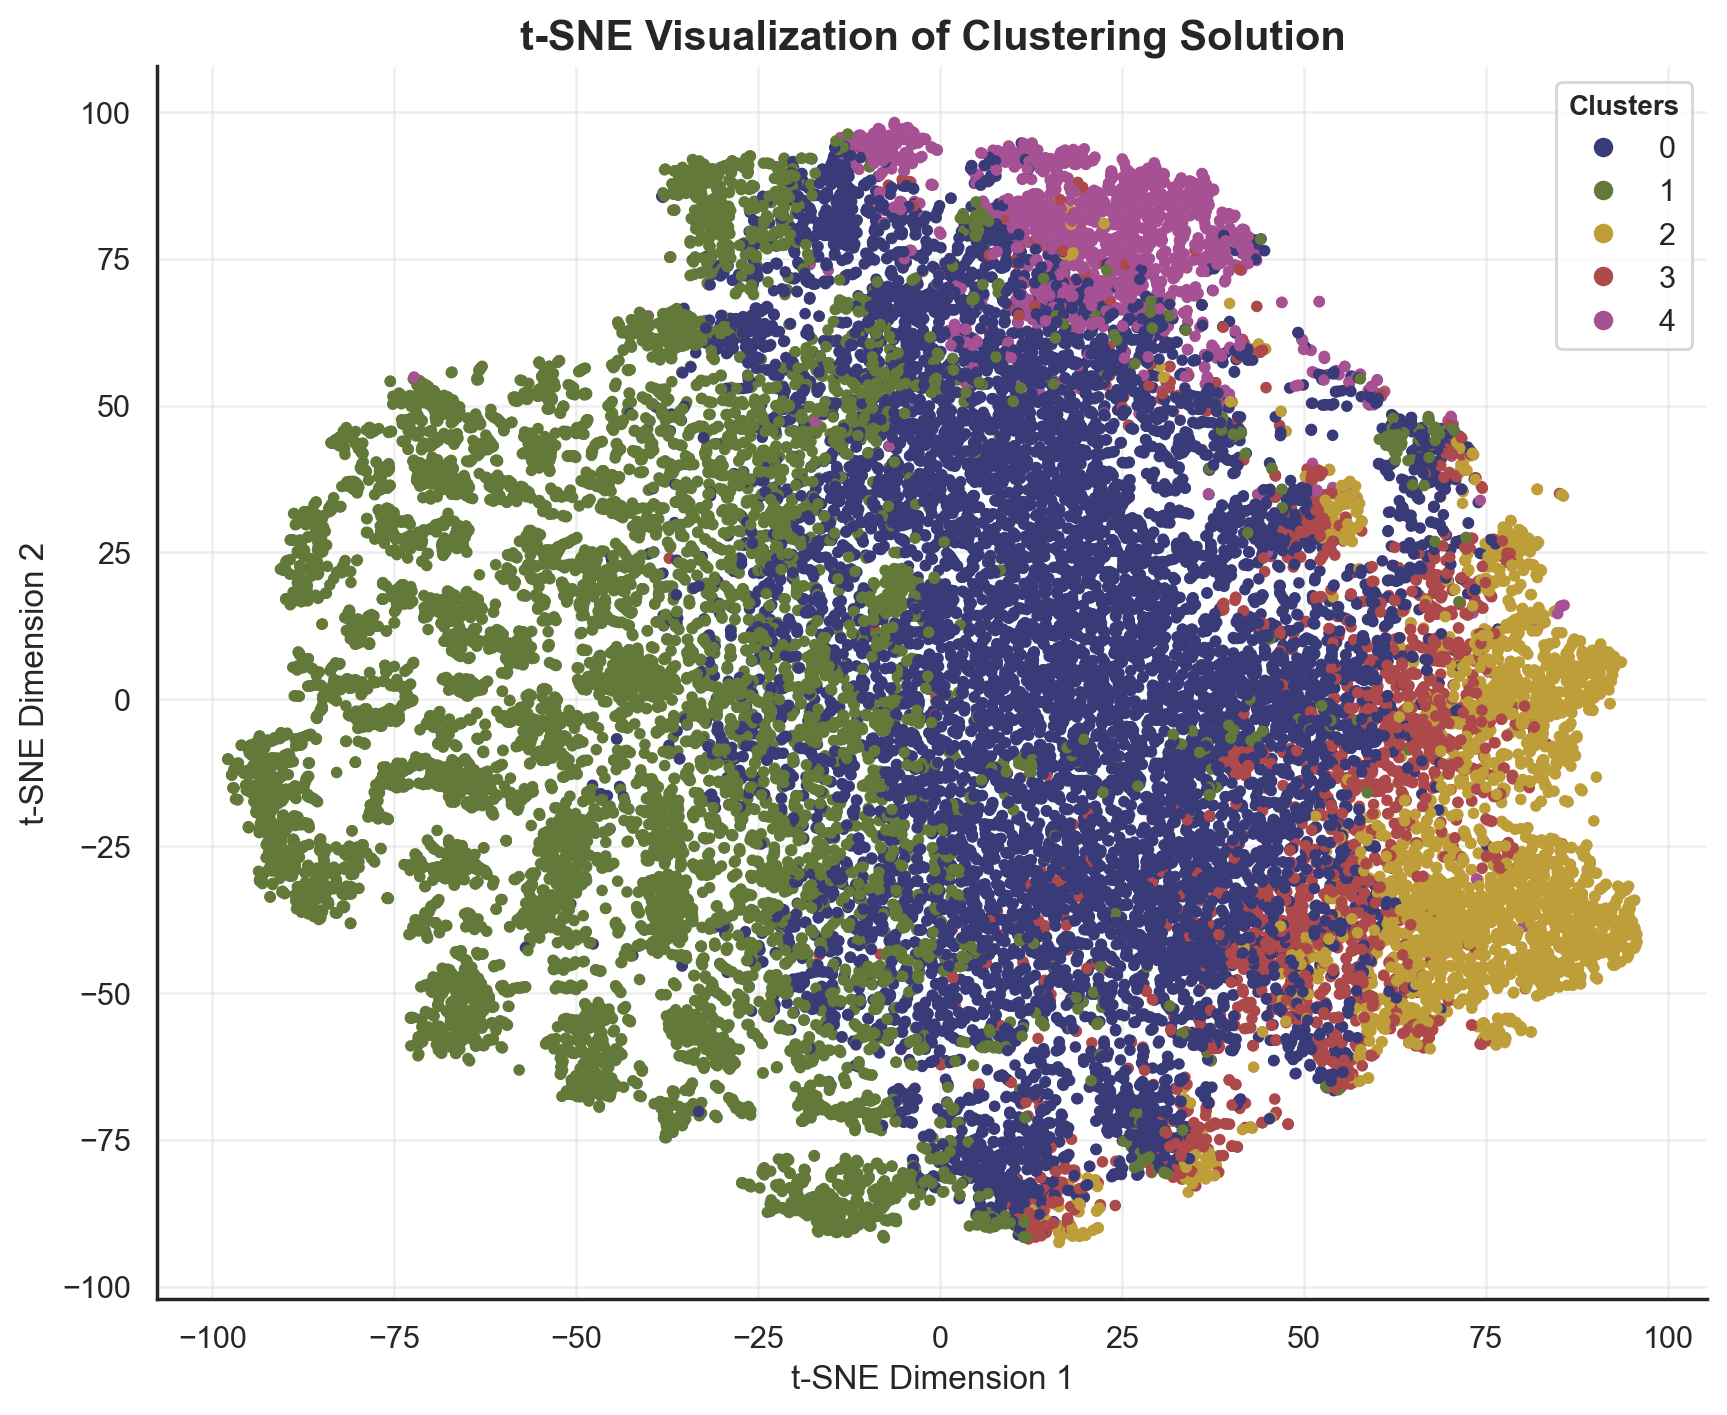

In [347]:
from matplotlib.colors import ListedColormap

# t-SNE visualization
fig, ax = plt.subplots(figsize=(10, 8))

# For Qualitative data - 'tab20b'
# Source: https://matplotlib.org/stable/users/explain/colors/colormaps.html
tab20b_palette = sns.color_palette("tab20b")
tab20b_10 = [tab20b_palette[i] for i in [0, 1, 4, 5, 8, 9, 12, 13, 16, 17]]  # Choose 10 colors from 'tab20b' palette
scatter_TSNE = ax.scatter(two_dim[:, 0], two_dim[:, 1], c=df['merged_labels'], cmap=ListedColormap(tab20b_10), s=10)

# Personalize the plot
ax.set_title('t-SNE Visualization of Clustering Solution', fontsize=15, fontweight='bold')
ax.set_xlabel('t-SNE Dimension 1', fontsize=12)
ax.set_ylabel('t-SNE Dimension 2', fontsize=12)
ax.grid(True, alpha=0.3)

# Create a legend with proper titles
legend1 = ax.legend(*scatter_TSNE.legend_elements(), title='Clusters', loc='upper right', title_fontsize=10)
plt.setp(legend1.get_title(), fontweight='bold')

# Remove the color bar
ax.get_figure().colorbar(scatter_TSNE).remove()

sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/tSNE_Clustering.png', dpi=300, bbox_inches='tight')
plt.show()

### **Visualize using `UMAP`**

In [ ]:
# UMAP initialization
reducer = umap.UMAP(random_state=42, verbose=True)
embedding = reducer.fit_transform(df[metric_features])

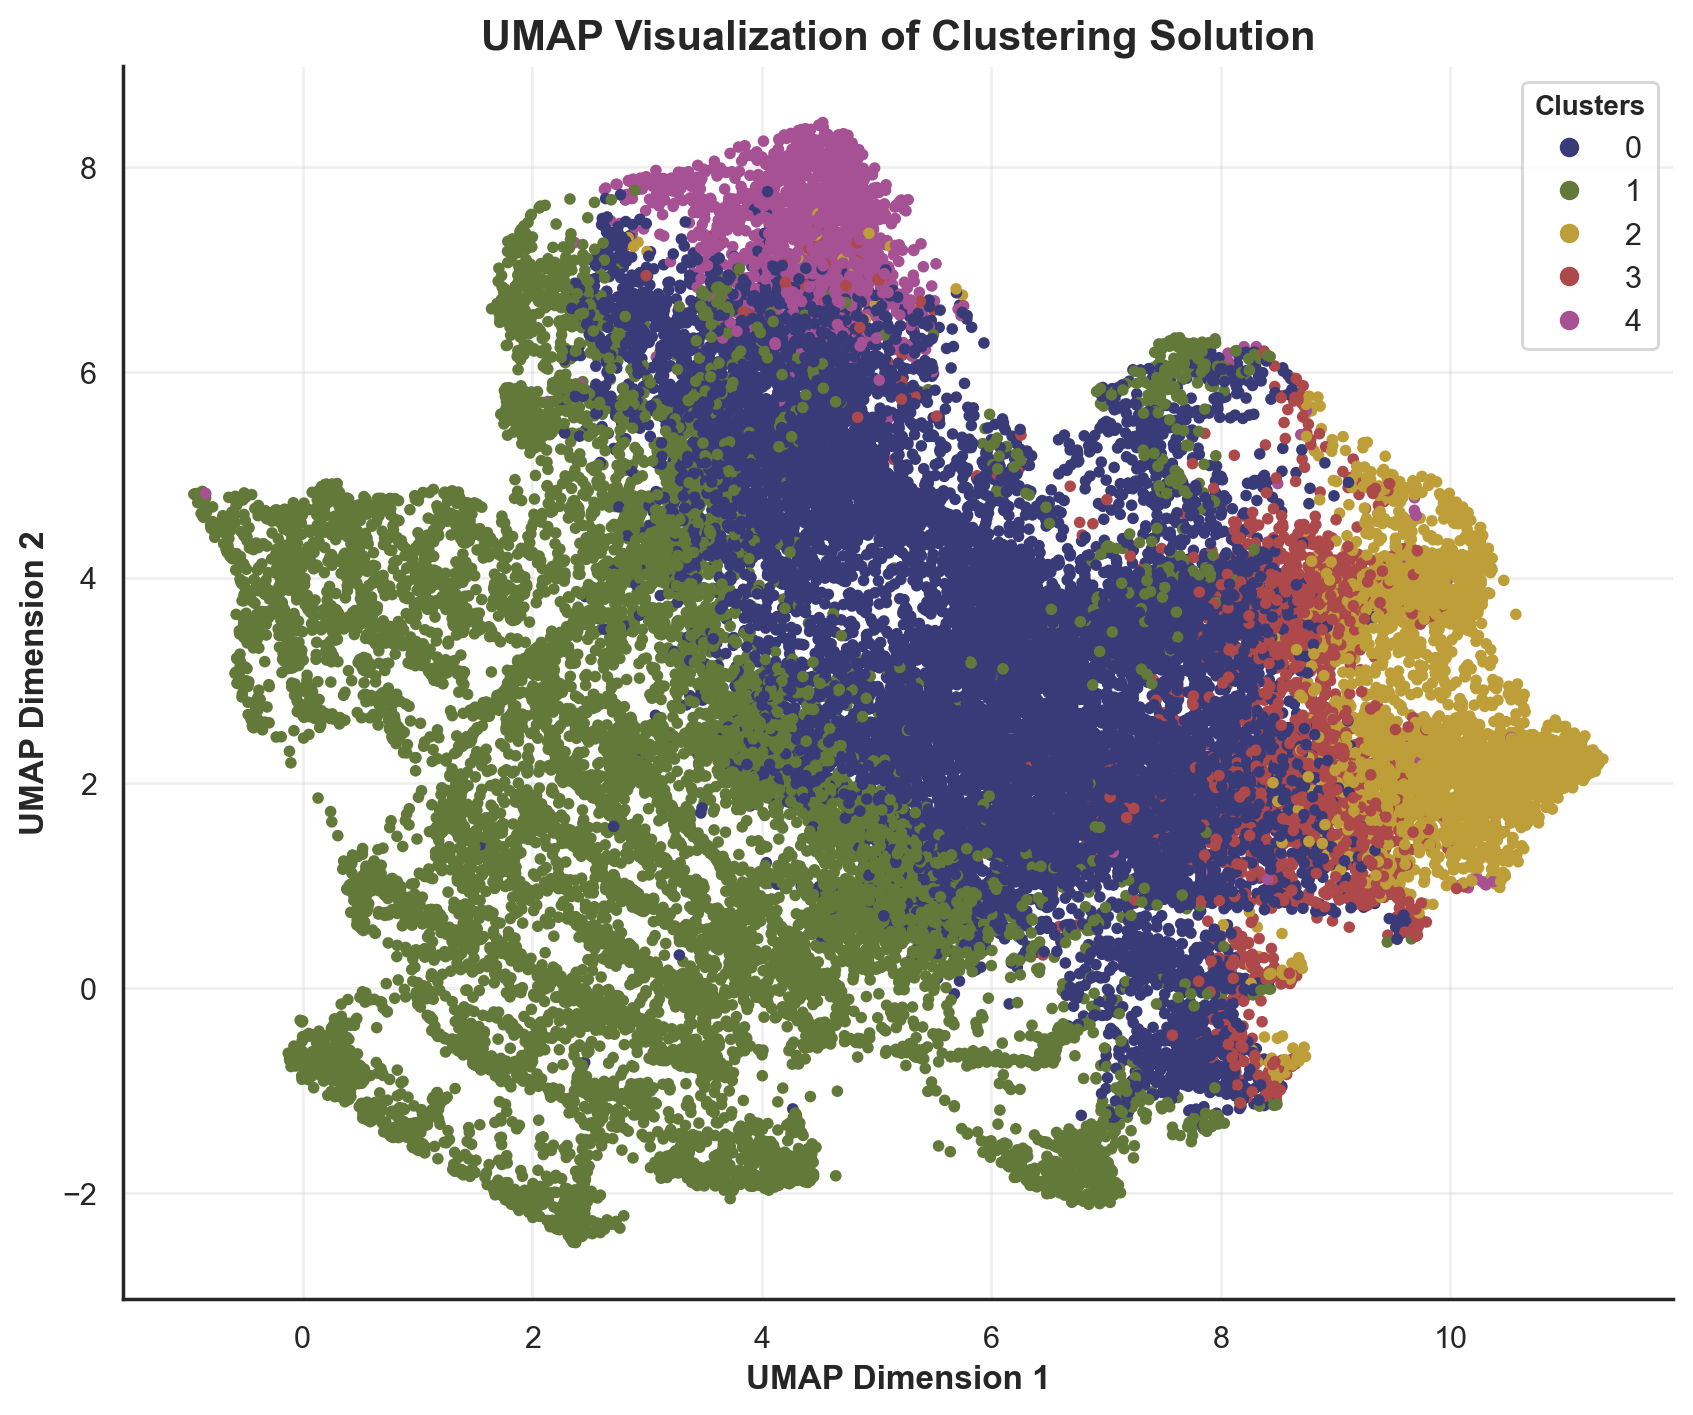

In [324]:
# UMAP visualization
fig, ax = plt.subplots(figsize=(10, 8))
scatter_UMAP = ax.scatter(x=embedding[:, 0], y=embedding[:, 1], c=df['merged_labels'], cmap=ListedColormap(tab20b_10), s=10)

# Personalize the plot
ax.set_title('UMAP Visualization of Clustering Solution', fontsize=15, fontweight='bold')
ax.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold')
ax.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Create a legend with proper titles
legend1 = ax.legend(*scatter_UMAP.legend_elements(), title='Clusters', loc='upper right', title_fontsize=10)
plt.setp(legend1.get_title(), fontweight='bold')

# Remove the color bar
ax.get_figure().colorbar(scatter_UMAP).remove()

sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/UMAP_Clustering.png', dpi=300, bbox_inches='tight')
plt.show()

---

### **📐 Assess Feature Importance**

#### **Using the R² 📰**

What proportion of each variables total SS is explained between clusters?

In [305]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

<div class="alert alert-block alert-warning" style="font-size:17px">

- $R^2$ a variância nos cluster que consegue captar

</div>

In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_feature_importance = r2_variables(df[metric_features + ['merged_labels']], 'merged_labels').drop('merged_labels')

# Create a DataFrame with the R² values
r2_feature_importance = pd.DataFrame(r2_feature_importance, columns=['R²'])
r2_feature_importance = r2_feature_importance.sort_values('R²', ascending=False)
r2_feature_importance

R²
order_count                             0.706879
HR_Lunch_Dinner_PC                      0.633545
CUI_Total_Food_Types                    0.589467
chain_count                             0.579419
days_between_orders_per_order           0.572918
CUI_Total_Amount_Spent                  0.495424
HR_LateNight_Breakfast_PC               0.465231
CUI_NOTAsian_Italian_OTHER_NOTSnack_PC  0.374305
first_order                             0.304552
CUI_Chicken_Chinese_Noodle_PC           0.299231
Wednesday                               0.298745
Tuesday                                 0.287381
Monday                                  0.285720
Thursday                                0.278868
Sunday                                  0.277140
last_order                              0.263358
Saturday                                0.245196
Friday                                  0.227947
CUI_American_Cafe_Japanese_PC           0.179641
CUI_Avg_Amount_Spent                    0.114967
CUI_Healthy_NOTAmerican_PC              0.018799
CUI_Indian_PC                           0.008842
HR_AfternoonSnack_PC                    0.007044
CUI_Japanese_NOTBeverages_PC            0.005097
HR_Evening_PC                           0.003728
CUI_Beverages_Thai_PC                   0.001404

In [336]:
# Save the R² values to an Excel file
r2_feature_importance.to_excel('./Clustering_Outputs/DM2425_Clustering_R2_FeatureImportance.xlsx', index=True)

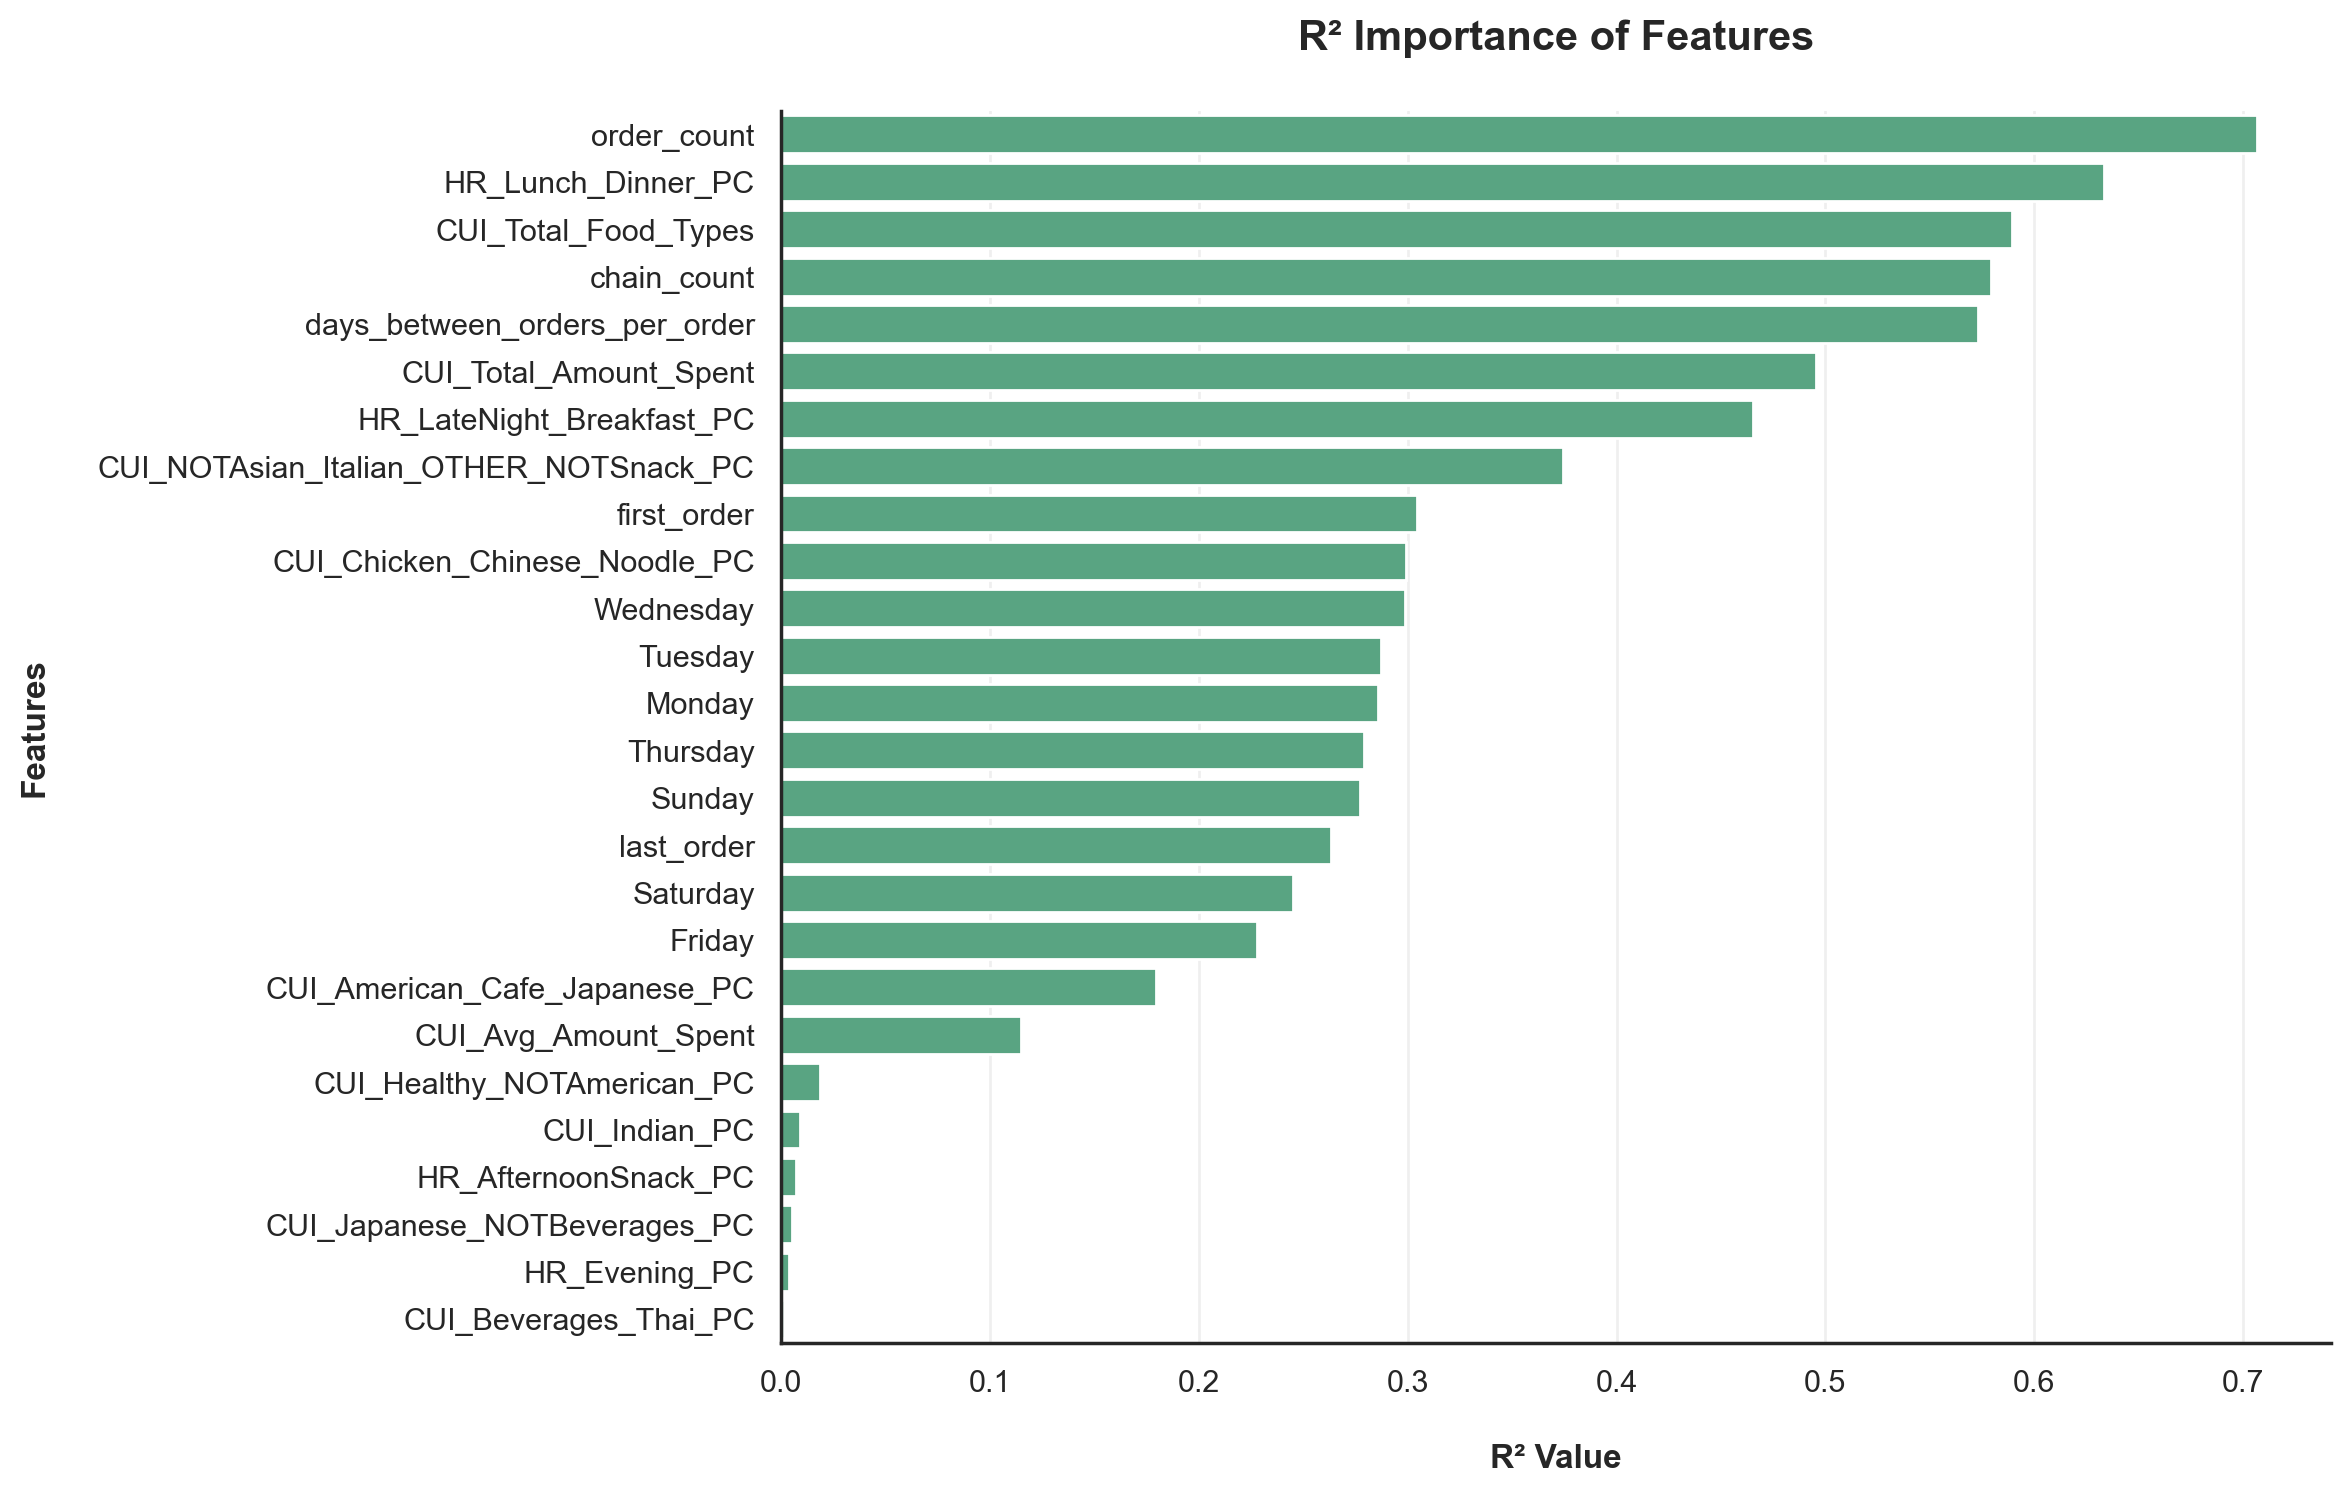

In [341]:
# Plot the R² values
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='R²', y=r2_feature_importance.index, data=r2_feature_importance, color='#4cb083', ax=ax)

# Personalize the plot
ax.set_title('R² Importance of Features\n', fontsize=15, fontweight='bold')
ax.set_xlabel('\nR² Value', fontsize=12, fontweight='bold')
ax.set_ylabel('Features\n', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/FeatureImportance_Clustering.png', dpi=300, bbox_inches='tight')
plt.show()

#### **Using the Decision Tree 🌲**

In [307]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

# Preparing the data
X = df[metric_features]
y = df.merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 83.26% of the customers correctly


In [328]:
# Assessing feature importance
pd.DataFrame(dt.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

Importance
days_between_orders_per_order             0.603954
order_count                               0.310398
HR_Lunch_Dinner_PC                        0.075388
CUI_Total_Food_Types                      0.010261
chain_count                               0.000000
Sunday                                    0.000000
HR_Evening_PC                             0.000000
HR_LateNight_Breakfast_PC                 0.000000
Saturday                                  0.000000
Friday                                    0.000000
Thursday                                  0.000000
Wednesday                                 0.000000
Tuesday                                   0.000000
Monday                                    0.000000
CUI_Japanese_NOTBeverages_PC              0.000000
CUI_Beverages_Thai_PC                     0.000000
first_order                               0.000000
CUI_Indian_PC                             0.000000
CUI_Healthy_NOTAmerican_PC                0.000000
CUI_Chicken_Chinese_Noodle_PC             0.000000
CUI_American_Cafe_Japanese_PC             0.000000
CUI_NOTAsian_Italian_OTHER_NOTSnack_PC    0.000000
CUI_Avg_Amount_Spent                      0.000000
CUI_Total_Amount_Spent                    0.000000
last_order                                0.000000
HR_AfternoonSnack_PC                      0.000000

In [329]:
# Assessing feature importance (> 0)
important_features = pd.DataFrame(dt.feature_importances_, index=X_train.columns, columns=['Importance'])
important_features = important_features[important_features['Importance'] > 0].sort_values(by='Importance', ascending=False)
important_features

Importance
days_between_orders_per_order    0.603954
order_count                      0.310398
HR_Lunch_Dinner_PC               0.075388
CUI_Total_Food_Types             0.010261

In [331]:
# Saving the table as an Excel file
important_features.to_excel('./Clustering_Outputs/DecisionTree_FeatureImportance.xlsx', index=True)

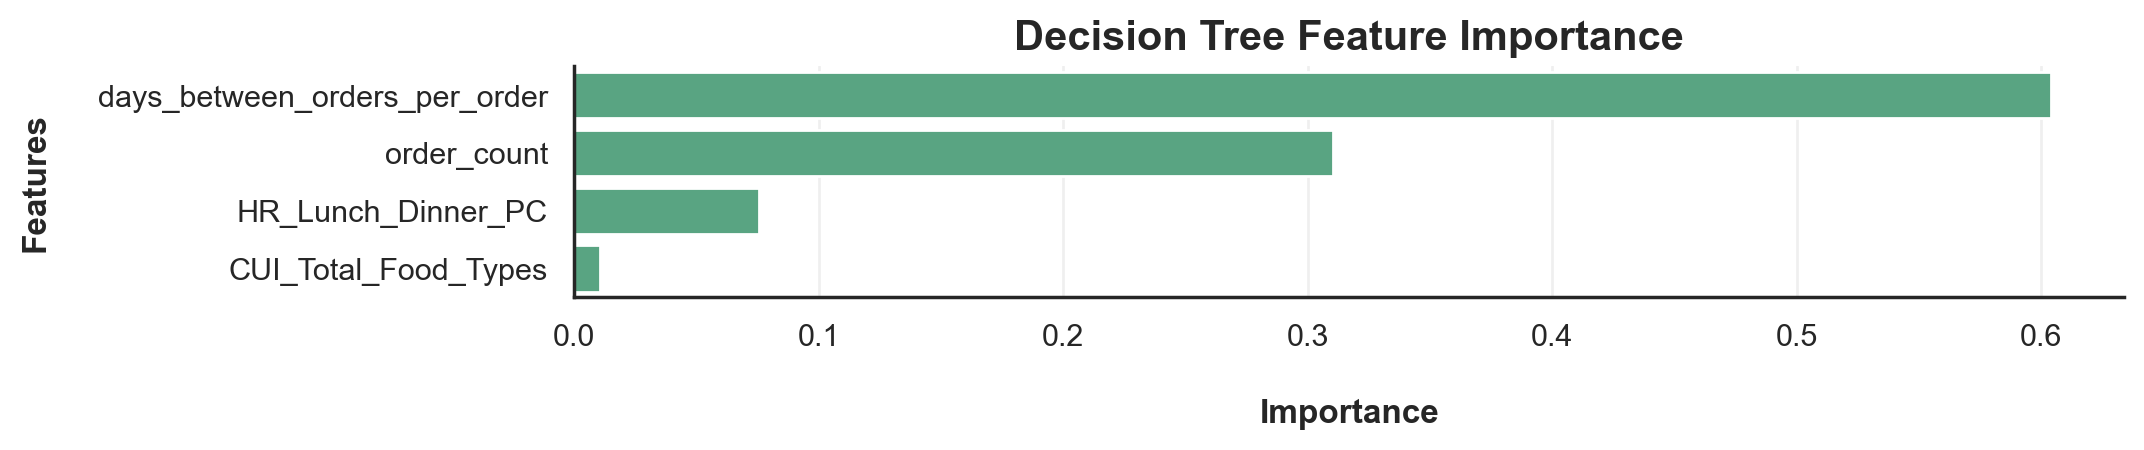

In [343]:
# Plotting the decision tree feature importance values
fig, ax = plt.subplots(figsize=(10, 1.5))
sns.barplot(x='Importance', y=important_features.index, data=important_features, color='#4cb083', ax=ax)

# Personalize the plot
ax.set_title('Decision Tree Feature Importance', fontsize=15, fontweight='bold')
ax.set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax.set_ylabel('Features\n', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/DecisionTree_FeatureImportance.png', dpi=300, bbox_inches='tight')
plt.show()

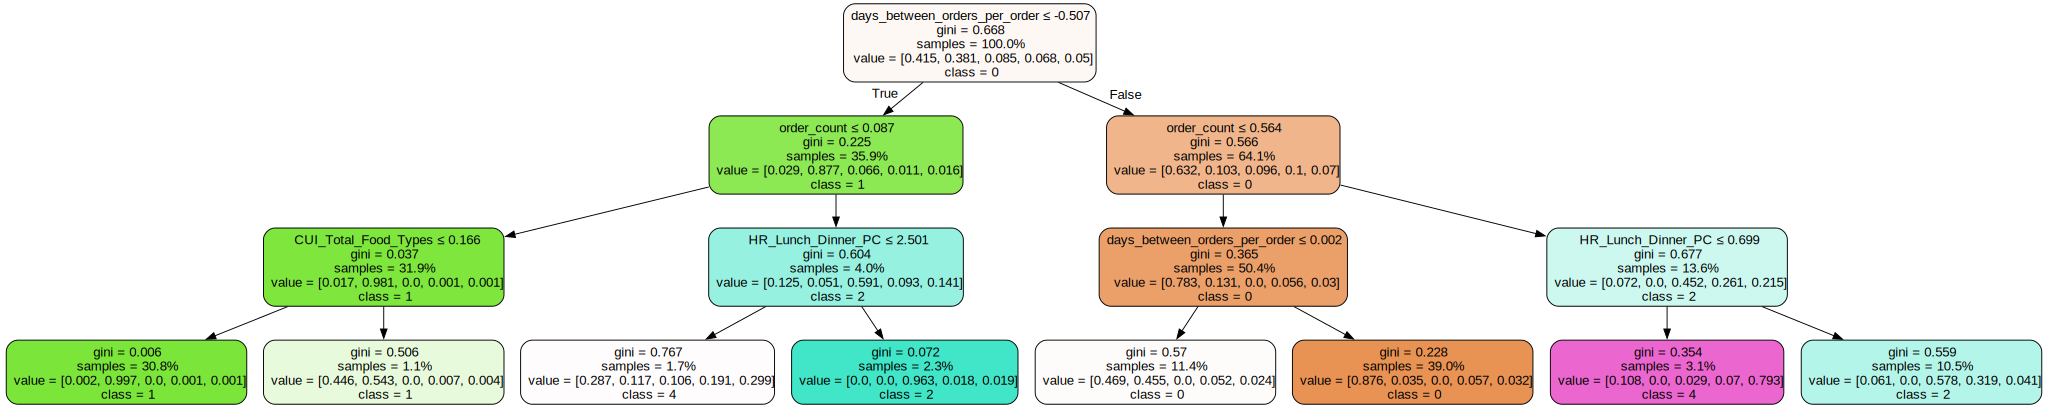

In [345]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True, 
                           class_names=[str(i) for i in dt.classes_])
g = graphviz.Source(dot_data)
g

---

# **💾 Save Data** 

<br>

- To finish this notebook and proceed to Streamlit App, we will save the preprocessed dataset and the clustering results.

In [310]:
ABCDEats.columns[ABCDEats.columns.duplicated()]

Index([], dtype='object')

In [312]:
# Save the clustering results to a parquet file (+ preprocessing)
ABCDEats.to_parquet('data/DM2425_ABCDEats_ClusteringResults.parquet')
ABCDEats.to_parquet('../[DM]_Dashboard_Group37/DM2425_ABCDEats_ClusteringResults.parquet')

---